In [1]:
from connectivity_matrix_functions import find_poly, create_shp_index, calc_connectivity_lh, write_to_file, plot_conn_mat, plot_conn_mat_norm, plot_conn_mat_norm_noAN, plot_conn_mat_normcol_noAN, plot_conn_mat_diff
import pandas as pd
import geopandas as gpd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.gridspec import GridSpec
import cartopy
import cartopy.crs as ccrs
import time
import datetime
from netCDF4 import Dataset

In [2]:
polygons_start_filename = "/gpfs/home/rpe16nbu/projects/ocpp_mo1/misc/polygons_BoB6_start.geojson"
polygons_end_filename = "/gpfs/home/rpe16nbu/projects/ocpp_mo1/misc/polygons_BoB6_A&N_split.geojson"

In [3]:
polygons_start, polygons_start_idx, polygons_start_names = create_shp_index(polygons_start_filename, 'name') # start polygons
polygons_end, polygons_end_idx, polygons_end_names = create_shp_index(polygons_end_filename, 'name') # end polygons

File /gpfs/home/rpe16nbu/projects/ocpp_mo1/misc/polygons_BoB6_start.geojson  has  6  polygons
File /gpfs/home/rpe16nbu/projects/ocpp_mo1/misc/polygons_BoB6_A&N_split.geojson  has  7  polygons


In [4]:
# name of input/output files and location they are saved:
particle_input_file_SL = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/output/paper_data/BoB_SL_uniform_Cop_daily_Jun2018-Sept2019_monsoon.nc'
particle_input_file_India = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/output/paper_data/BoB_India_uniform_Cop_daily_Jun2018-Sept2019_monsoon.nc'
particle_input_file_Bang = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/output/paper_data/BoB_Bang_uniform_Cop_daily_Jun2018-Sept2019_monsoon.nc'
particle_input_file_Myan = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/output/paper_data/BoB_Myan_uniform_Cop_daily_Jun2018-Sept2019_monsoon.nc'
particle_input_file_Thai = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/output/paper_data/BoB_Thai_uniform_Cop_daily_Jun2018-Sept2019_monsoon.nc'
particle_input_file_Indo = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/output/paper_data/BoB_Indonesia_uniform_Cop_daily_Jun2018-Sept2019_monsoon.nc'
velocity_input_file = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/input/processed/paper_data/ocean_velocities_Cop_Jun2018-Sept2019_daily.nc'

# import data
openfile_p9 = Dataset(particle_input_file_SL)
lon_p_SL = openfile_p9.variables['lon']
lat_p_SL = openfile_p9.variables['lat']
time_p_SL = openfile_p9.variables['time']
openfile_p10 = Dataset(particle_input_file_India)
lon_p_India = openfile_p10.variables['lon']
lat_p_India = openfile_p10.variables['lat']
openfile_p11 = Dataset(particle_input_file_Bang)
lon_p_Bang = openfile_p11.variables['lon']
lat_p_Bang = openfile_p11.variables['lat']
openfile_p12 = Dataset(particle_input_file_Myan)
lon_p_Myan = openfile_p12.variables['lon']
lat_p_Myan = openfile_p12.variables['lat']
openfile_p13 = Dataset(particle_input_file_Thai)
lon_p_Thai = openfile_p13.variables['lon']
lat_p_Thai = openfile_p13.variables['lat']
openfile_p14 = Dataset(particle_input_file_Indo)
lon_p_Indo = openfile_p14.variables['lon']
lat_p_Indo = openfile_p14.variables['lat']

In [ ]:
# Figure 1

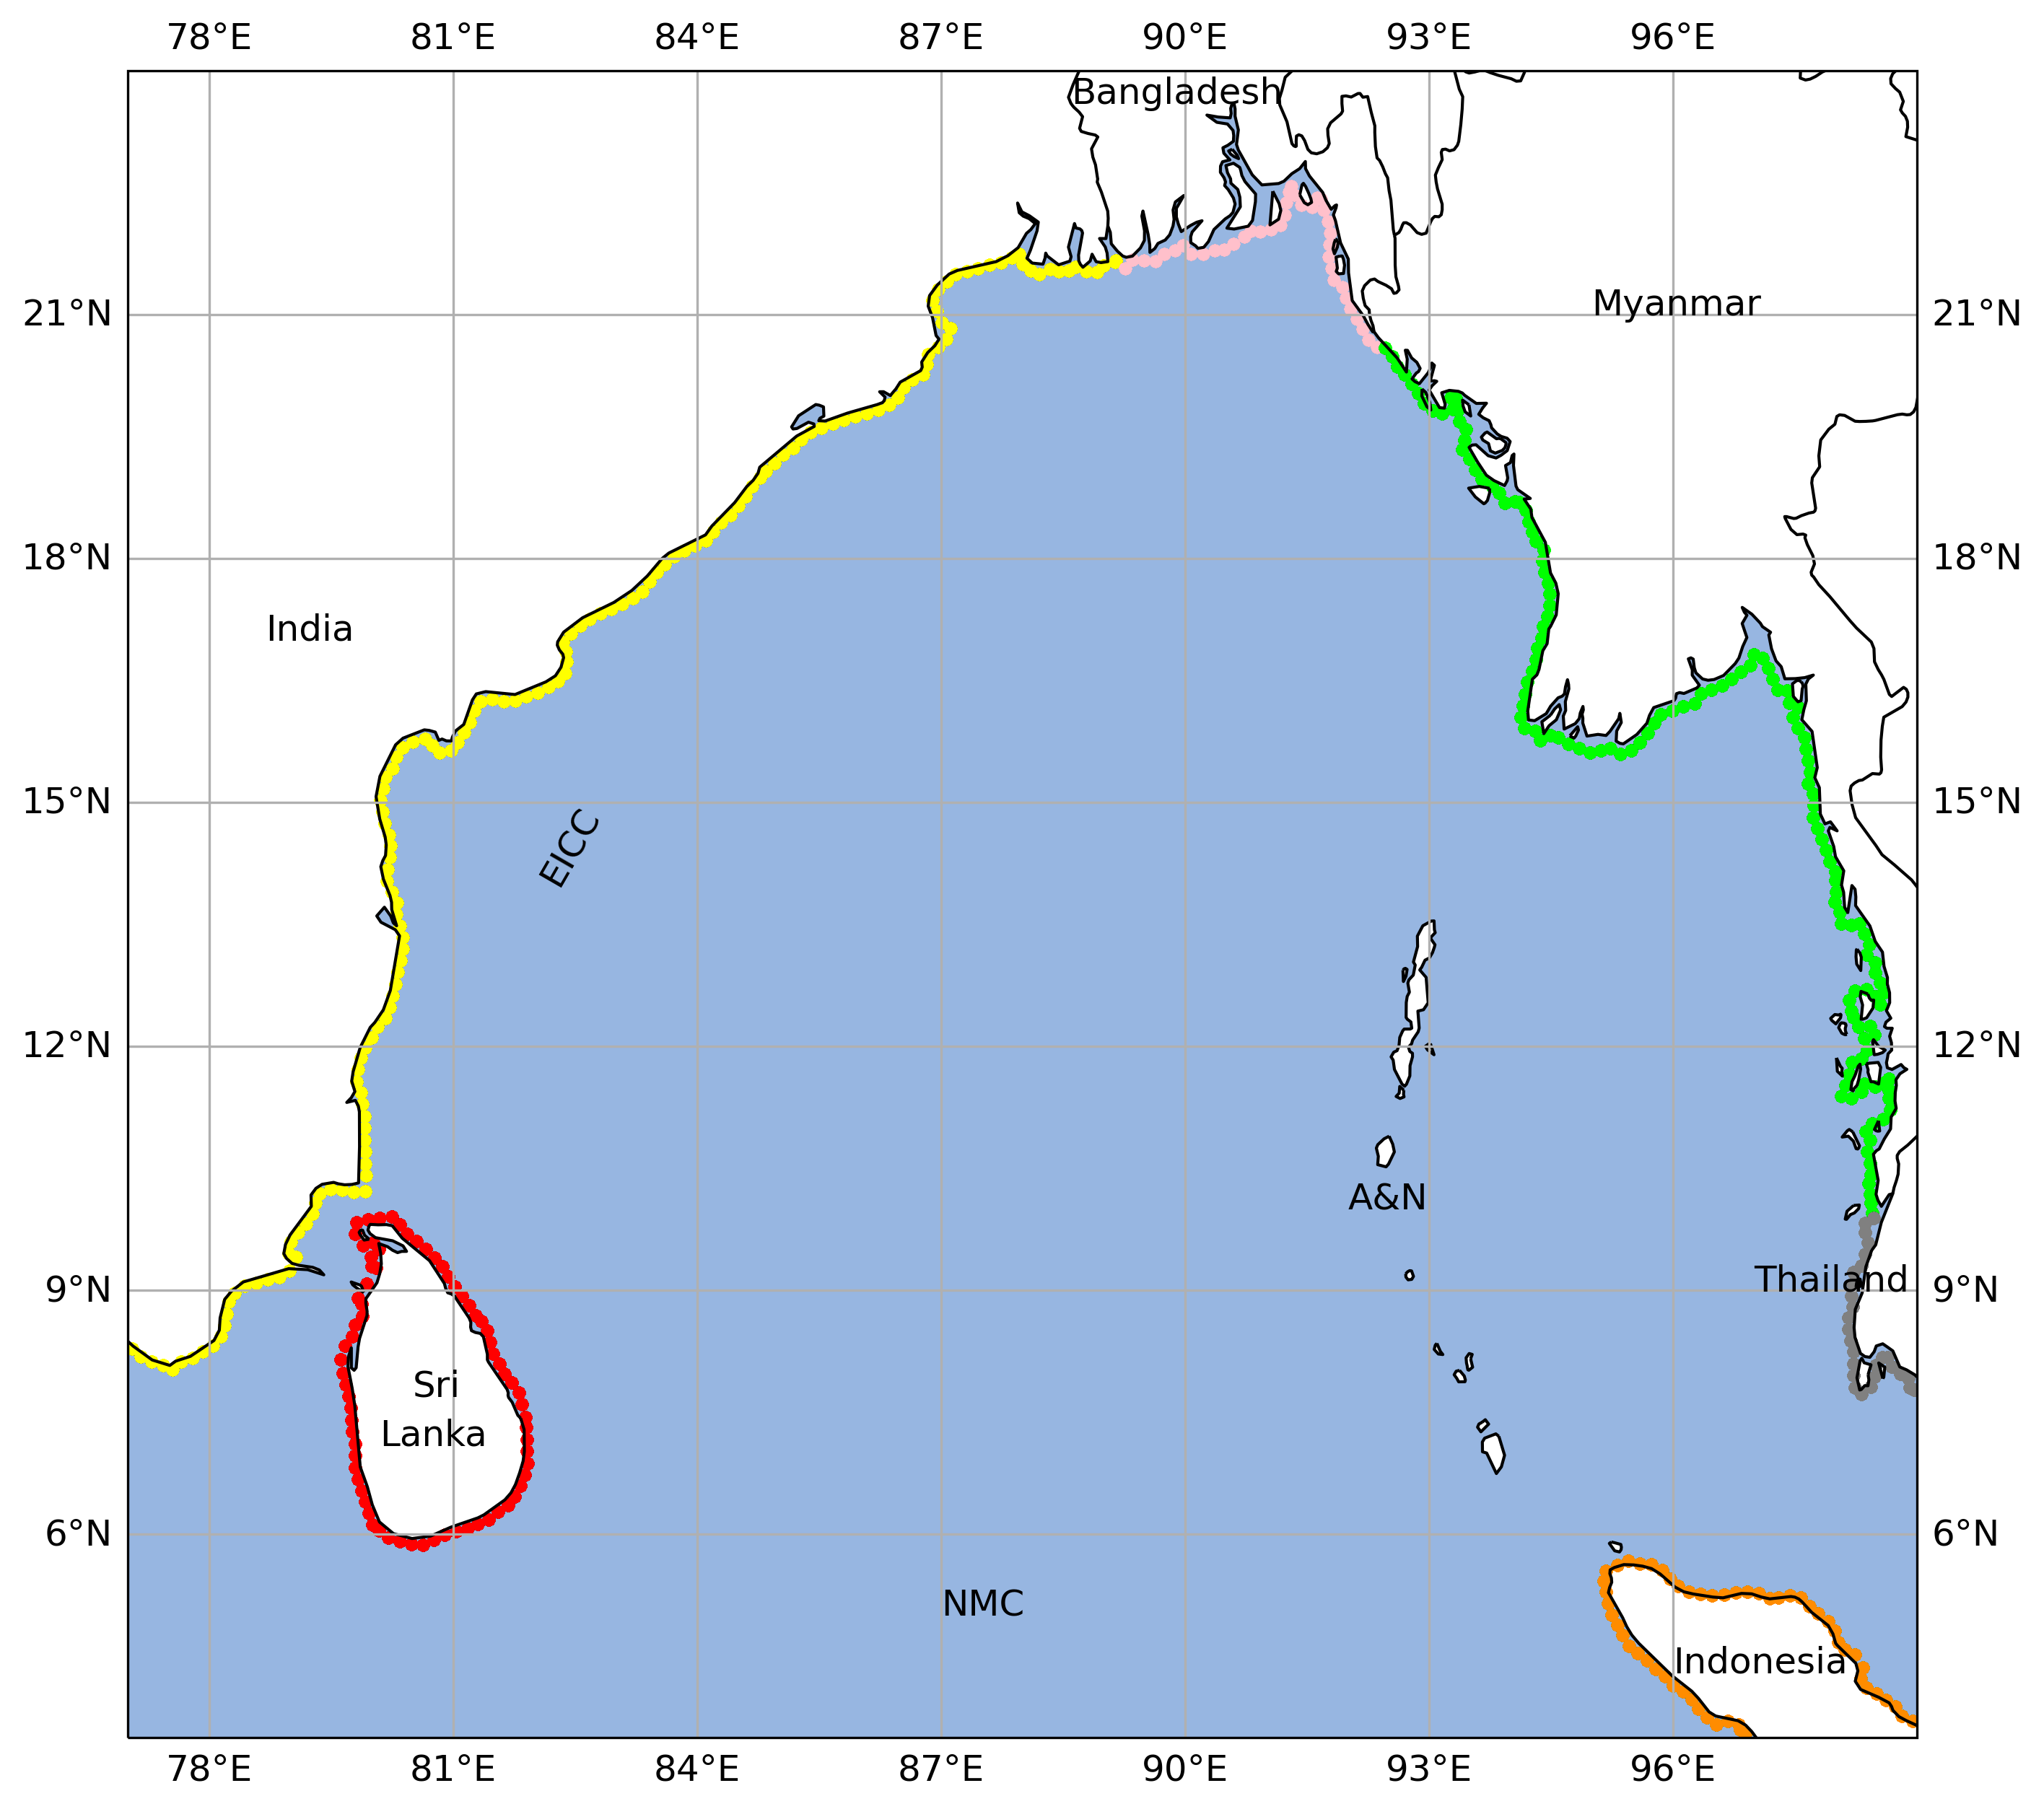

In [5]:
# post-monsoon

# create figure
fig = plt.figure(figsize=(20, 10), dpi=300)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([77,99,3.5,24]) # full domain
# ax.set_extent([86,93,20,24])
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, facecolor='white')
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', linewidth=1.0)
# ax.add_feature(cartopy.feature.BORDERS, linestyle=':', edgecolor='gray')
ax.coastlines()
gl = ax.gridlines(draw_labels=True)
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}

transform = ccrs.PlateCarree()._as_mpl_transform(ax)

ax.scatter(lon_p_SL[0:,0], lat_p_SL[0:,0],color='r', s=10)
ax.scatter(lon_p_India[0:,0], lat_p_India[0:,0],color='yellow', s=10)
ax.scatter(lon_p_Bang[0:,0], lat_p_Bang[0:,0],color='pink', s=10)
ax.scatter(lon_p_Myan[0:,0], lat_p_Myan[0:,0],color='lime', s=10)
ax.scatter(lon_p_Thai[0:,0], lat_p_Thai[0:,0],color='grey', s=10)
ax.scatter(lon_p_Indo[0:,0], lat_p_Indo[0:,0],color='darkorange', s=10)

ax.annotate('Sri', xy=(80.5, 7.7), xycoords=transform,
            fontsize=12, color='k')
ax.annotate('Lanka', xy=(80.1, 7.1), xycoords=transform,
            fontsize=12, color='k')
ax.annotate('India', xy=(78.7, 17), xycoords=transform,
            fontsize=12, color='k')
ax.annotate('Bangladesh', xy=(88.6, 23.6), xycoords=transform,
            fontsize=12, color='k')
ax.annotate('Myanmar', xy=(95, 21), xycoords=transform,
            fontsize=12, color='k')
ax.annotate('Thailand', xy=(97.0, 9), xycoords=transform,
            fontsize=12, color='k')
ax.annotate('Indonesia', xy=(96, 4.3), xycoords=transform,
            fontsize=12, color='k')
ax.annotate('A&N', xy=(92, 10), xycoords=transform,
            fontsize=12, color='k')

ax.annotate('EICC', xy=(82, 14), xycoords=transform, rotation=60,
            fontsize=12, color='k')
ax.annotate('NMC', xy=(87, 5), xycoords=transform,
            fontsize=12, color='k')

fig.savefig("/gpfs/home/rpe16nbu/projects/ocpp_mo1/plots/paper_data/BoB_template_plain_postmonsoon", bbox_inches='tight', facecolor='white', transparent=False)


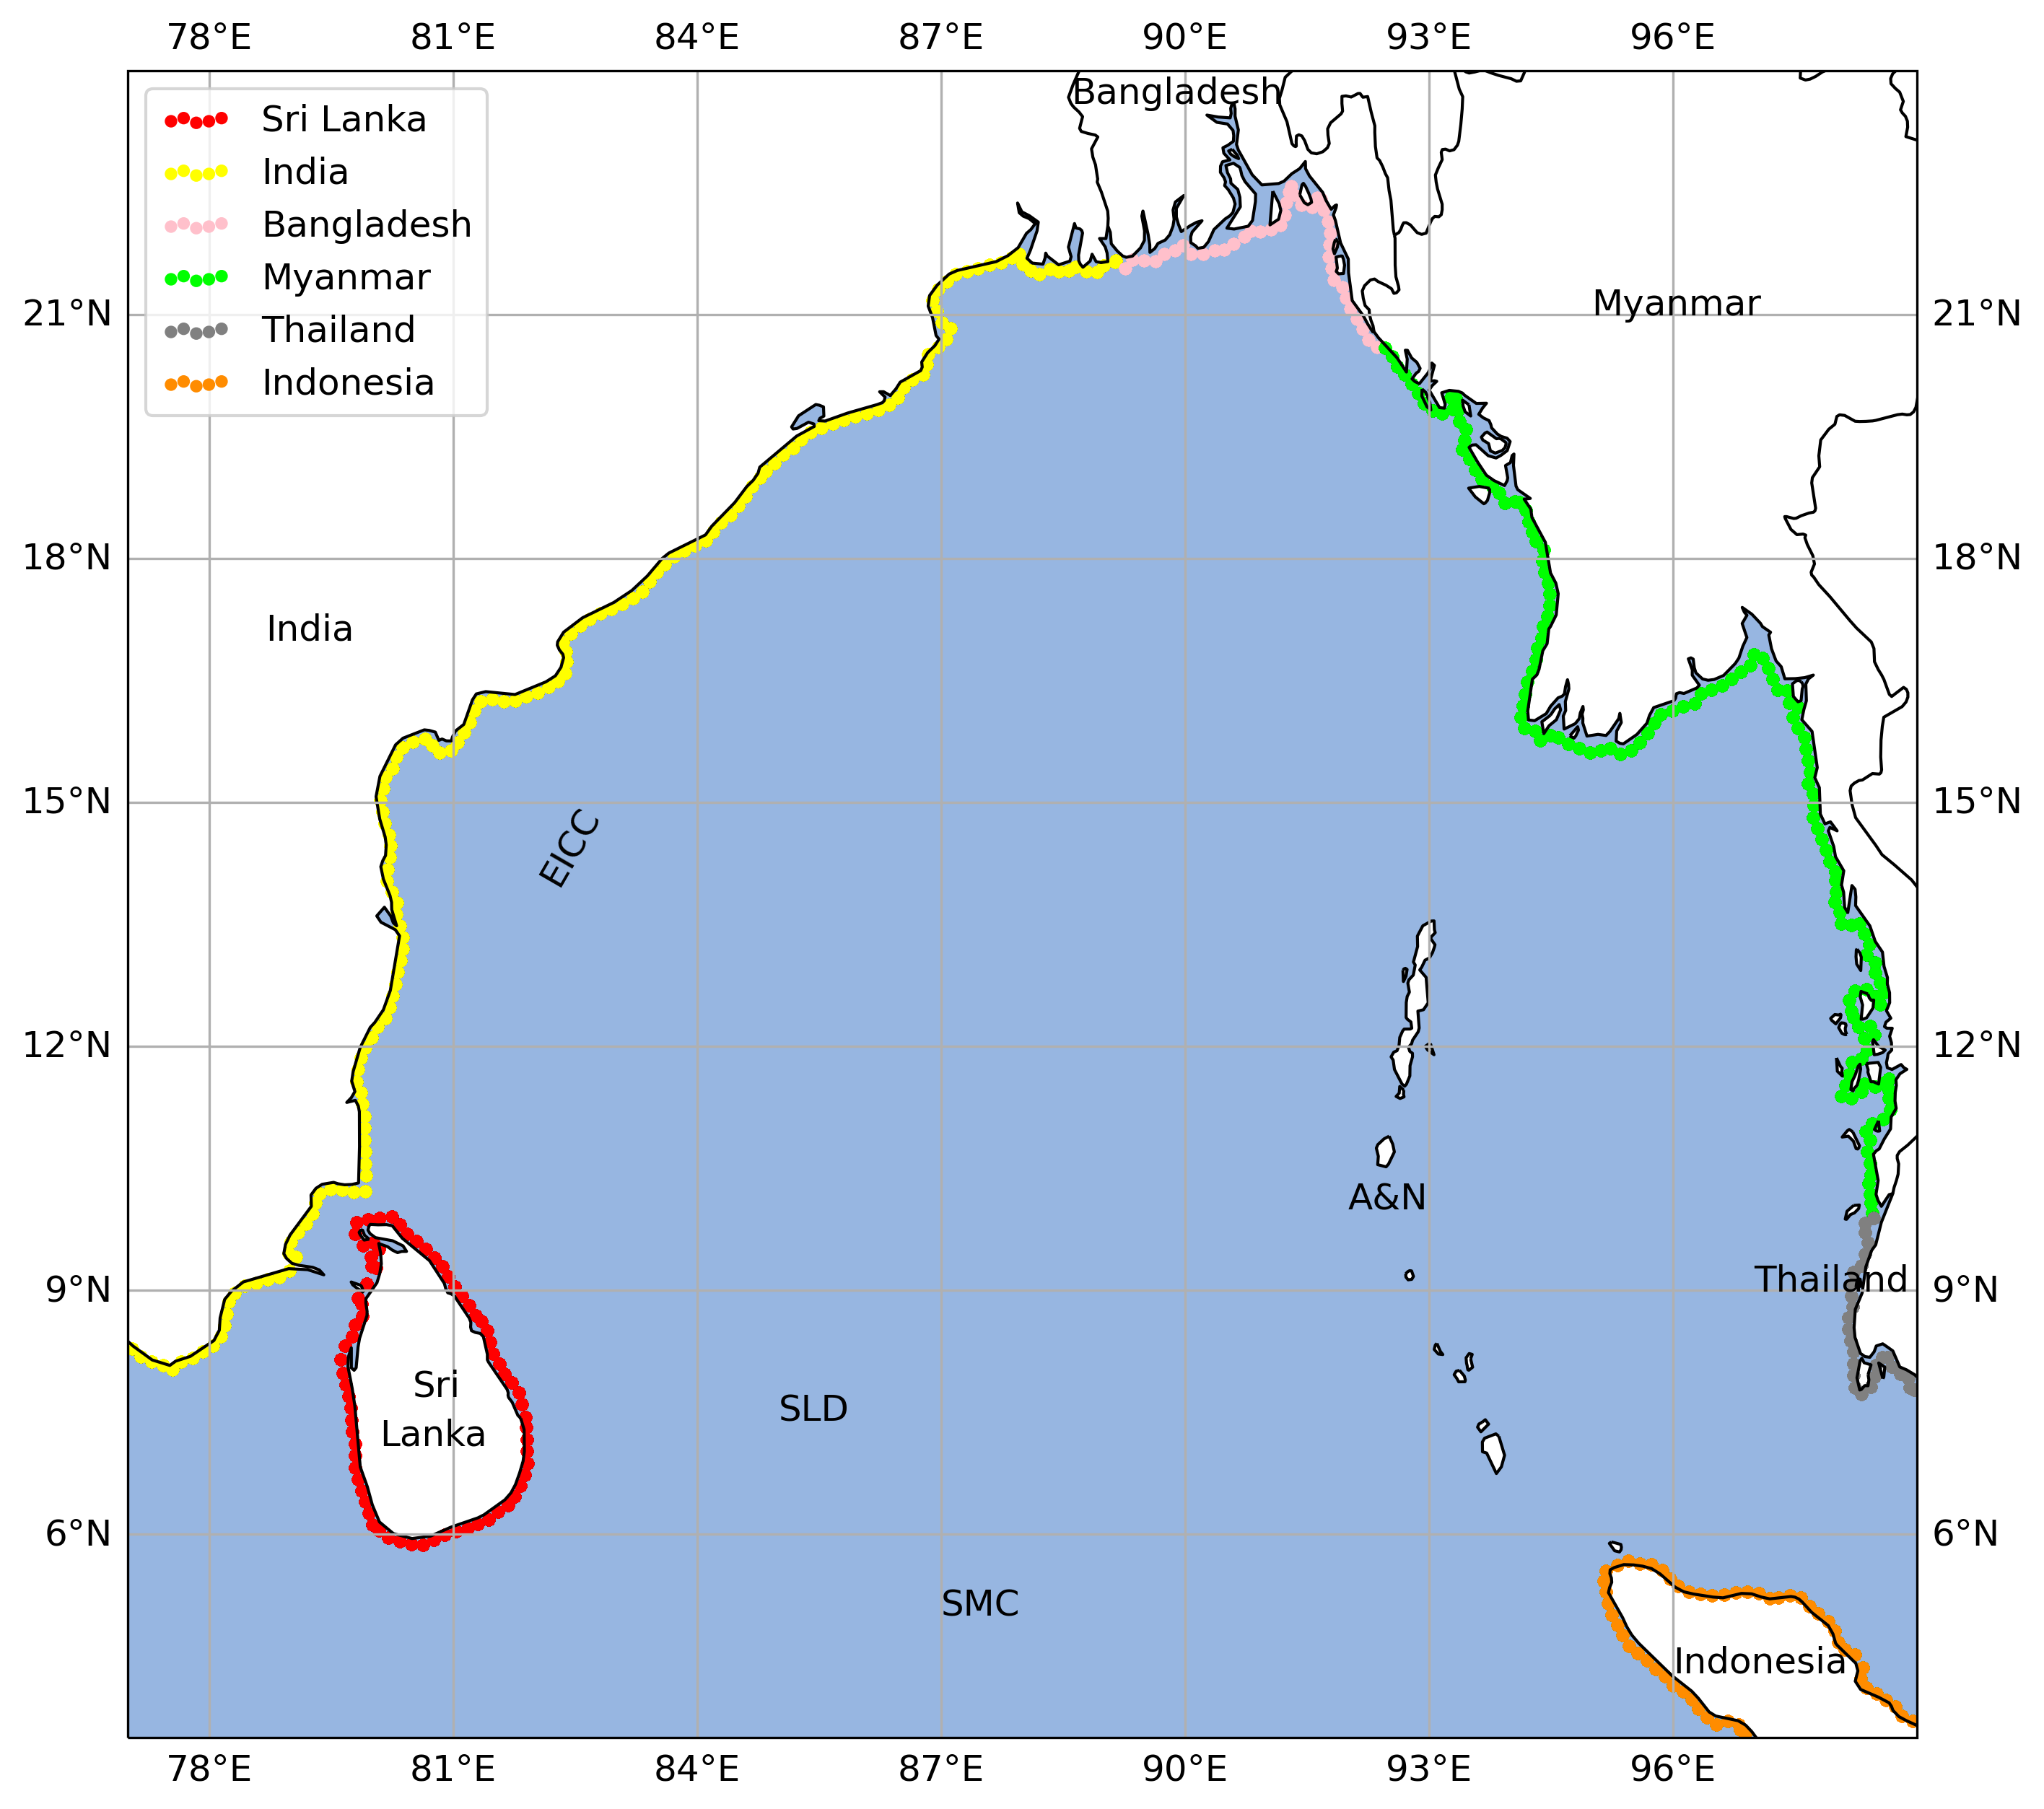

In [6]:
# pre/monsoon
# create figure
fig = plt.figure(figsize=(20, 10), dpi=300)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([77,99,3.5,24]) # full domain
# ax.set_extent([86,93,20,24])
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, facecolor='white')
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', linewidth=1.0)
# ax.add_feature(cartopy.feature.BORDERS, linestyle=':', edgecolor='gray')
ax.coastlines()
gl = ax.gridlines(draw_labels=True)
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}

transform = ccrs.PlateCarree()._as_mpl_transform(ax)

p0 = ax.scatter(lon_p_SL[0:,0], lat_p_SL[0:,0],color='r', s=10)
p1 = ax.scatter(lon_p_India[0:,0], lat_p_India[0:,0],color='yellow', s=10)
p2 = ax.scatter(lon_p_Bang[0:,0], lat_p_Bang[0:,0],color='pink', s=10)
p3 = ax.scatter(lon_p_Myan[0:,0], lat_p_Myan[0:,0],color='lime', s=10)
p4 = ax.scatter(lon_p_Thai[0:,0], lat_p_Thai[0:,0],color='grey', s=10)
p5 = ax.scatter(lon_p_Indo[0:,0], lat_p_Indo[0:,0],color='darkorange', s=10)

ax.annotate('Sri', xy=(80.5, 7.7), xycoords=transform,
            fontsize=12, color='k')
ax.annotate('Lanka', xy=(80.1, 7.1), xycoords=transform,
            fontsize=12, color='k')
ax.annotate('India', xy=(78.7, 17), xycoords=transform,
            fontsize=12, color='k')
ax.annotate('Bangladesh', xy=(88.6, 23.6), xycoords=transform,
            fontsize=12, color='k')
ax.annotate('Myanmar', xy=(95, 21), xycoords=transform,
            fontsize=12, color='k')
ax.annotate('Thailand', xy=(97.0, 9), xycoords=transform,
            fontsize=12, color='k')
ax.annotate('Indonesia', xy=(96, 4.3), xycoords=transform,
            fontsize=12, color='k')
ax.annotate('A&N', xy=(92, 10), xycoords=transform,
            fontsize=12, color='k')

ax.annotate('EICC', xy=(82, 14), xycoords=transform, rotation=60,
            fontsize=12, color='k')
ax.annotate('SMC', xy=(87, 5), xycoords=transform,
            fontsize=12, color='k')
ax.annotate('SLD', xy=(85, 7.4), xycoords=transform,
            fontsize=12, color='k')

plt.legend((p0, p1, p2, p3, p4, p5),
           ('Sri Lanka', 'India', 'Bangladesh', 'Myanmar', 'Thailand', 'Indonesia'),
           scatterpoints=5,
           loc='upper left',
           ncol=1,
           fontsize=12)

fig.savefig("/gpfs/home/rpe16nbu/projects/ocpp_mo1/plots/paper_data/BoB_template_plain_premonsoon", bbox_inches='tight', facecolor='white', transparent=False)


In [12]:
# Figure 2a

In [13]:
drifter_data = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/misc/drifter_6hour_undrogued_only.csv'
cols = ["WMO", "time", "latitiude", "longitude"]
data_df = pd.read_csv(drifter_data, sep=",", skipinitialspace=True, header = 1, names=cols)

In [14]:
lat_drifter1 = data_df.latitiude[data_df.WMO==1401521]
lon_drifter1 = data_df.longitude[data_df.WMO==1401521]
lat_drifter2 = data_df.latitiude[data_df.WMO==5301513]
lon_drifter2 = data_df.longitude[data_df.WMO==5301513]
lat_drifter3 = data_df.latitiude[data_df.WMO==1101522]
lon_drifter3 = data_df.longitude[data_df.WMO==1101522]
lat_drifter4 = data_df.latitiude[data_df.WMO==4101590]
lon_drifter4 = data_df.longitude[data_df.WMO==4101590]
lat_drifter5 = data_df.latitiude[data_df.WMO==2301617]
lon_drifter5 = data_df.longitude[data_df.WMO==2301617]
lat_drifter6 = data_df.latitiude[data_df.WMO==2301619]
lon_drifter6 = data_df.longitude[data_df.WMO==2301619]
lat_drifter7 = data_df.latitiude[data_df.WMO==2301604]
lon_drifter7 = data_df.longitude[data_df.WMO==2301604]
lat_drifter8 = data_df.latitiude[data_df.WMO==5301585]
lon_drifter8 = data_df.longitude[data_df.WMO==5301585]

In [15]:
# Copernicus input
# velocity_input_file = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/input/processed/paper_data/validation/ocean_velocities_Cop_Jul-Aug2018_daily_validation_yellow.nc'
# velocity_input_file = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/input/processed/paper_data/validation/ocean_velocities_Cop_Sept-Dec2018_daily_validation_red.nc'
# velocity_input_file = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/input/processed/paper_data/validation/ocean_velocities_Cop_Aug-Oct2018_daily_validation_pink.nc'
# velocity_input_file = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/input/processed/paper_data/validation/ocean_velocities_Cop_Sept2018-July2019_daily_validation_green.nc'
velocity_input_file = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/input/processed/paper_data/validation/ocean_velocities_Cop_Jun-July2019_daily_validation_orange.nc'

openfile_u = Dataset(velocity_input_file)
lon_vec_u = openfile_u.variables['longitude']
lat_vec_u = openfile_u.variables['latitude']
time_u = openfile_u.variables['time']
u =  openfile_u.variables['uo']
v =  openfile_u.variables['vo']

u_subset= u[0,0,:,:]
v_subset= v[0,0,:,:]
speed_subset = np.sqrt(np.abs(u_subset)**2 + np.abs(v_subset)**2)

# create grids of coordinates rather than just lists
lon_grid_u, lat_grid_u = np.meshgrid(lon_vec_u, lat_vec_u)

# defining datetime objects for start and end time of simulation
interval_type = 'hours'
interval_num_start = int(time_u[0])
interval_num_end = int(time_u[-1])

origin_time_u = datetime.datetime.strptime('1950/01/01 00:00:00','%Y/%m/%d %H:%M:%S') # simulation time output is number of hours since 00:00:00 01-01-1950
start_time_u = origin_time_u + datetime.timedelta(**{interval_type: interval_num_start}) # turns integers into a datetime object to be added to origin_time
end_time_u = origin_time_u + datetime.timedelta(**{interval_type: interval_num_end})


In [16]:
# ROMS input
# velocity_input_file_u = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/input/processed/paper_data/validation/ocean_velocities_u_ROMS_Jul-Aug2018_daily_validation_yellow.nc'
# velocity_input_file_v = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/input/processed/paper_data/validation/ocean_velocities_v_ROMS_Jul-Aug2018_daily_validation_yellow.nc'
# velocity_input_file_u = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/input/processed/paper_data/validation/ocean_velocities_u_ROMS_Sept-Dec2018_daily_validation_red.nc'
# velocity_input_file_v = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/input/processed/paper_data/validation/ocean_velocities_v_ROMS_Sept-Dec2018_daily_validation_red.nc'
# velocity_input_file_u = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/input/processed/paper_data/validation/ocean_velocities_u_ROMS_Aug-Oct2018_daily_validation_pink.nc'
# velocity_input_file_v = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/input/processed/paper_data/validation/ocean_velocities_v_ROMS_Aug-Oct2018_daily_validation_pink.nc'
# velocity_input_file_u = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/input/processed/paper_data/validation/ocean_velocities_u_ROMS_Sept2018-Jul2019_daily_validation_green.nc'
# velocity_input_file_v = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/input/processed/paper_data/validation/ocean_velocities_v_ROMS_Sept2018-Jul2019_daily_validation_green.nc'
velocity_input_file_u = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/input/processed/paper_data/validation/ocean_velocities_u_ROMS_Jun-July2019_daily_validation_orange.nc'
velocity_input_file_v = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/input/processed/paper_data/validation/ocean_velocities_v_ROMS_Jun-July2019_daily_validation_orange.nc'

openfile_uR = Dataset(velocity_input_file_u)
openfile_vR = Dataset(velocity_input_file_v)
lon_vec_uR = openfile_uR.variables['lon_u']
lat_vec_uR = openfile_uR.variables['lat_u']
lon_vec_vR = openfile_vR.variables['lon_v']
lat_vec_vR = openfile_vR.variables['lat_v']
time_uR = openfile_uR.variables['ocean_time']
uR =  openfile_uR.variables['u']
vR =  openfile_vR.variables['v']

u_subsetR = uR[0,0,:-1,:]
v_subsetR = vR[0,0,:,:-1]
speed_subsetR = np.sqrt(np.abs(u_subsetR)**2 + np.abs(v_subsetR)**2)

# # create grids of coordinates rather than just lists
# lon_grid_u, lat_grid_u = np.meshgrid(lon_vec_u, lat_vec_u)
lon_grid_uR = lon_vec_uR
lat_grid_uR = lat_vec_uR

# defining datetime objects for start and end time of simulation
interval_type = 'seconds'
interval_num_startR = int(time_uR[0])
interval_num_endR = int(time_uR[-1])

origin_time_uR = datetime.datetime.strptime('2017-01-01 00:00:00','%Y-%m-%d %H:%M:%S') # simulation time output is number of hours since 00:00:00 01-01-1950
start_time_uR = origin_time_uR + datetime.timedelta(**{interval_type: interval_num_startR}) # turns integers into a datetime object to be added to origin_time
end_time_uR = origin_time_uR + datetime.timedelta(**{interval_type: interval_num_endR})

In [17]:
particle_input_file = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/output/paper_data/validation/BoB_Cop_daily_validation_orange.nc'
particle_input_fileR = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/output/paper_data/validation/BoB_ROMS_daily_validation_orange.nc'

# import data
openfile_p = Dataset(particle_input_file)
lon_p = openfile_p.variables['lon']
lat_p = openfile_p.variables['lat']
time_p = openfile_p.variables['time']

openfile_pR = Dataset(particle_input_fileR)
lon_pR = openfile_pR.variables['lon']
lat_pR = openfile_pR.variables['lat']
time_pR = openfile_pR.variables['time']

In [23]:
CMEMS_sep_dists = [55.76250788,59.79824339,70.3053312,70.62065673,37.90227422]
CMEMS_std_devs = [37.09595994,28.19078151,38.90275448,38.02558416,17.43446894]
ROMS_sep_dists = [43.65731458,79.63193581,143.5152277,91.20180301,75.34572541]
ROMS_std_devs = [23.22829011,63.825822,77.01788581,49.5593881,34.39362725]
 
colours = ['yellow', 'r', 'lightpink', 'lime', 'darkorange']
drifters = ['D1', 'D2', 'D3', 'D4', 'D5']

/tmp/ipykernel_8796/2682245117.py:110: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


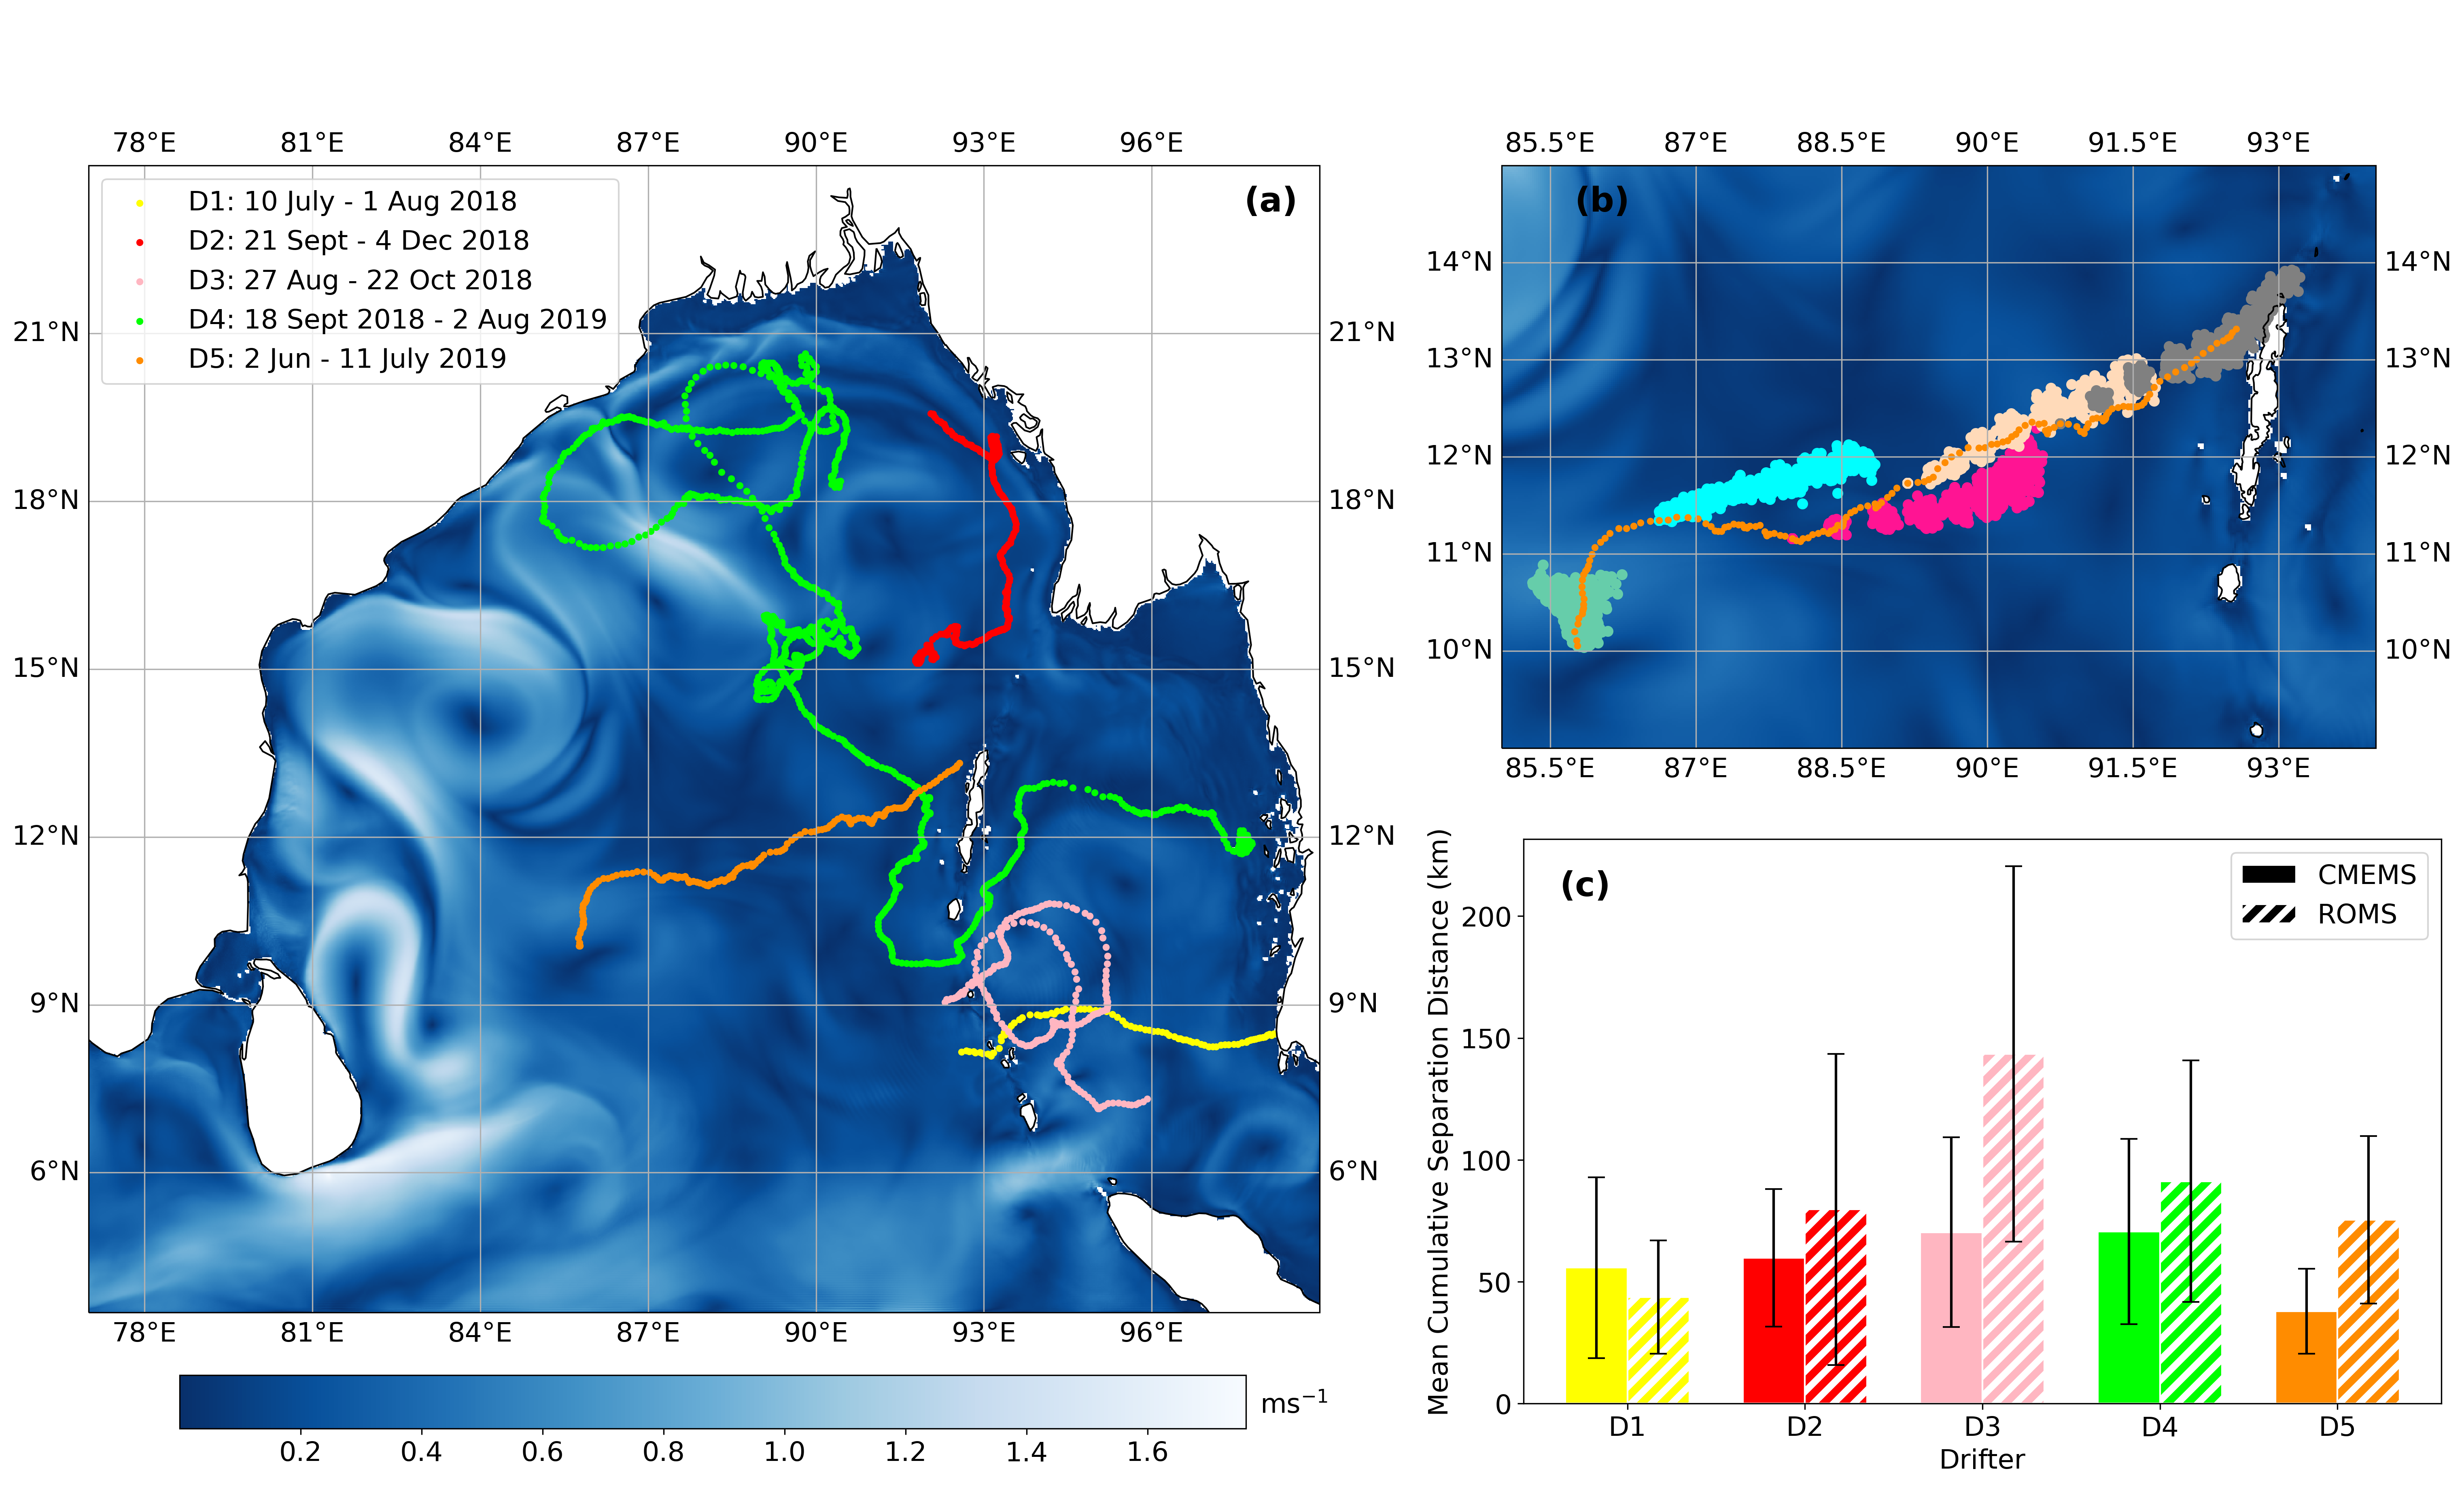

In [113]:
# Create a figure and GridSpec
fig = plt.figure(figsize=(18, 15), dpi=300)
gs = GridSpec(2, 3)

# Create a bigger subplot on the left
# all drifter tracks figure
ax1 = fig.add_subplot(gs[:, 0], projection=ccrs.PlateCarree())
ax1.set_extent([77, 99, 3.5, 24])  # BoB domain
ax1.coastlines()
gl = ax1.gridlines(draw_labels=True)
gl.xlabel_style = {'fontsize': 16}
gl.ylabel_style = {'fontsize': 16}

m1 = ax1.pcolormesh(lon_grid_uR,lat_grid_uR,speed_subsetR, cmap='Blues_r', vmin=np.amin(speed_subsetR), vmax=np.amax(speed_subsetR)) # mappable content

cbar = fig.colorbar(m1, location='bottom')
cbar.set_label(r'ms$^{-1}$', fontsize=16, x=1.045, labelpad=-44)
cbar.ax.tick_params(labelsize=16)
pos = cbar.ax.get_position()
cbar.ax.set_position([pos.x0, pos.y0, pos.width-0.4, pos.height])

p1 = ax1.scatter(lon_drifter4, lat_drifter4, transform=ccrs.PlateCarree(), color='yellow', s=10)
p2 = ax1.scatter(lon_drifter5, lat_drifter5, transform=ccrs.PlateCarree(), color='r', s=10)
p3 = ax1.scatter(lon_drifter6, lat_drifter6, transform=ccrs.PlateCarree(), color='lightpink', s=10)
p4 = ax1.scatter(lon_drifter7, lat_drifter7, transform=ccrs.PlateCarree(), color='lime', s=10)
p5 = ax1.scatter(lon_drifter8, lat_drifter8, transform=ccrs.PlateCarree(), color='darkorange', s=10)

plt.legend((p1, p2, p3, p4, p5),
           ('D1: 10 July - 1 Aug 2018', 'D2: 21 Sept - 4 Dec 2018', 'D3: 27 Aug - 22 Oct 2018', 'D4: 18 Sept 2018 - 2 Aug 2019', 'D5: 2 Jun - 11 July 2019'),
           scatterpoints=1,
           loc='upper left',
           ncol=1,
           fontsize=16)


# Create two smaller subplots on the right
ax2 = fig.add_subplot(gs[0, 1], projection=ccrs.PlateCarree())
ax2.set_extent([85,94,9,15]) # orange
ax2.coastlines()
gl2 = ax2.gridlines(draw_labels=True)
gl2.xlabel_style = {'fontsize': 16}
gl2.ylabel_style = {'fontsize': 16}

m2 = ax2.pcolormesh(lon_grid_uR,lat_grid_uR,speed_subsetR, cmap='Blues_r', vmin=np.amin(speed_subsetR), vmax=np.amax(speed_subsetR)) # mappable content

for ii in range(0,lon_pR.shape[0],6):
    if 0 <= time_pR[ii,0] < 604800:
        ax2.scatter(lon_pR[ii,:8], lat_pR[ii,:8], transform=ccrs.PlateCarree(), color='mediumaquamarine', s=30)
for ii in range(1,lon_pR.shape[0],6):
    if 604800 <= time_pR[ii,0] < 1209600:
        ax2.scatter(lon_pR[ii,:8], lat_pR[ii,:8], transform=ccrs.PlateCarree(), color='cyan', s=30)
for ii in range(2,lon_pR.shape[0],6):
    if 1209600 <= time_pR[ii,0] < 1814400:
        ax2.scatter(lon_pR[ii,:8], lat_pR[ii,:8], transform=ccrs.PlateCarree(), color='deeppink', s=30)
for ii in range(3,lon_pR.shape[0],6):
    if 1814400 <= time_pR[ii,0] < 2419200:
        ax2.scatter(lon_pR[ii,:8], lat_pR[ii,:8], transform=ccrs.PlateCarree(), color='peachpuff', s=30)
for ii in range(4,lon_pR.shape[0],6):
    if 2419200 <= time_pR[ii,0] < 3024000:
        ax2.scatter(lon_pR[ii,:8], lat_pR[ii,:8], transform=ccrs.PlateCarree(), color='grey', s=30)

p6 = ax2.scatter(lon_drifter8[2:], lat_drifter8[2:], transform=ccrs.PlateCarree(), color='darkorange', s=10)


ax3 = fig.add_subplot(gs[1, 1])

plt.rcParams['hatch.linewidth'] = 4.0

# Plot CMEMS data
bar_width = 0.35
index = np.arange(len(drifters))
for i in range(len(drifters)):
    ax3.bar(index[i] - bar_width/2, CMEMS_sep_dists[i], bar_width, color=colours[i], label=f'CMEMS {drifters[i]}', edgecolor='white')
    ax3.bar(index[i] + bar_width/2, ROMS_sep_dists[i], bar_width, color=colours[i], label=f'ROMS {drifters[i]}', edgecolor='white', hatch='//')#, alpha = 0.5, hatch='//')
    
# Add error bars
ax3.errorbar(index - bar_width/2, CMEMS_sep_dists, yerr=CMEMS_std_devs, fmt='none', color='black', capsize=5)
ax3.errorbar(index + bar_width/2, ROMS_sep_dists, yerr=ROMS_std_devs, fmt='none', color='black', capsize=5)

# Customize the plot
ax3.set_xticks(index)
ax3.set_xticklabels(drifters)
ax3.set_xlabel('Drifter', fontsize=16)
ax3.set_ylabel('Mean Cumulative Separation Distance (km)', fontsize=16)
ax3.tick_params(axis='both', which='major', labelsize=16)  # Larger tick labels

# Customize the legend
legend_labels = {'CMEMS': 'CMEMS', 'ROMS': 'ROMS'}
legend_elements = [
    patches.Rectangle((0, 0), 1, 1, facecolor='black', edgecolor='white', label=legend_labels['CMEMS']),
    patches.Rectangle((0, 0), 1, 1, facecolor='black', edgecolor='white', hatch='//', label=legend_labels['ROMS'])
]

ax3.legend(handles=legend_elements, fontsize=16)

ax1.set_position([0, 0, 0.63, 0.63])  # [left, bottom, width, height]
ax2.set_position([0.68, 0.295, 0.4, 0.35])  # [left, bottom, width, height]
ax3.set_position([0.69, -0.05, 0.42, 0.31])  # [left, bottom, width, height]
cbar.ax.set_position([pos.x0-0.05, pos.y0-0.26, pos.width+0.26, pos.height])

ax1.text(2.85, 1.4, "(a)", transform=axs[0,0].transAxes, fontsize=20, fontweight='bold', va='top')
ax2.text(2.60, 1.4, "(b)", transform=axs[0,1].transAxes, fontsize=20, fontweight='bold', va='top')
ax3.text(3.65, 0.5, "(c)", transform=axs[1,0].transAxes, fontsize=20, fontweight='bold', va='top')

plt.tight_layout()

fig.savefig("/gpfs/home/rpe16nbu/projects/ocpp_mo1/plots/paper_data/fig02", bbox_inches='tight', facecolor='white', transparent=False)


In [8]:
# Figure 3

In [9]:
def plot_conn_mat_paper_noextras(ax, input_conn_mat_file):
    conn_mat_df = pd.read_csv(input_conn_mat_file, index_col=0)
    conn_mat_df.replace(0.0, np.nan, inplace=True) # replace all zeros with NaNs, inplace=True changes it in the dataframe itself not in the variable created here.
    polygon_names_list_source = list(conn_mat_df) # need to remove Andaman and Nicobar
    polygon_names_list_source = [polygon_names_list_source[x] for x in [0,1,2,3,4,5] ]
    polygon_names_list_sink = list(conn_mat_df) # this prints out the column headings of the dataframe. For connectivity marices, the column and row headings are the same so I don't need to extract the row headings (which I think is more complicated...). I can just use the column headings as xticklabels and yticklabels

    #create figure
#     fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10), dpi=300)
    m1 = ax.matshow(conn_mat_df, cmap='Blues', vmin=0, vmax=1) # mappable content

    for (ii, jj), z in np.ndenumerate(conn_mat_df):
        if ~np.isnan(z):
            ax.text(jj, ii, '{:0.2f}'.format(z), ha='center', va='center')

#     ax.set_ylabel('Source location', fontsize=15)
#     ax.set_xlabel('Settle location', fontsize=15)

    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(polygon_names_list_sink)), labels=polygon_names_list_sink)
    ax.set_yticks(np.arange(len(polygon_names_list_source)), labels=polygon_names_list_source)
    ax.xaxis.set_ticks_position('bottom')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

    if ax == axs[0,0]:
        ax.set_xticks([])
        ax.set_xticklabels([])
        ax.set_ylabel('Source', fontsize='x-large')
    elif ax == axs[0,1] or ax == axs[1,1] or ax == axs[2,1]:
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xticklabels([])
        ax.set_yticklabels([])
    elif ax == axs[1,0] or ax == axs[2,0]:
        ax.set_xticks([])
        ax.set_xticklabels([])
        ax.set_ylabel('Source', fontsize='x-large')
    elif  ax == axs[3,0]:
        ax.set_xlabel('Sink', fontsize='x-large')
        ax.set_ylabel('Source', fontsize='x-large')
    elif  ax == axs[3,1]:
        ax.set_xlabel('Sink', fontsize='x-large') 
        ax.set_yticks([])
        ax.set_yticklabels([])
    

In [10]:
input_conn_mat_file_year_CMEMS = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/output/paper_data/connectivity/conn_mat6x7_year_Cop.csv'
input_conn_mat_file_year_ROMS = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/output/paper_data/connectivity/conn_mat6x7_year_ROMS.csv'
input_conn_mat_file_monsoon_CMEMS = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/output/paper_data/connectivity/conn_mat6x7_norm_BoB_uniform_Cop_daily_Jun2018-Sept2019_monsoon.csv'
input_conn_mat_file_monsoon_ROMS = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/output/paper_data/connectivity/conn_mat6x7_norm_BoB_uniform_ROMS_daily_Jun2018-Sept2019_monsoon.csv'
input_conn_mat_file_post_CMEMS = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/output/paper_data/connectivity/conn_mat6x7_norm_BoB_uniform_Cop_daily_Oct2018-Sept2019_postmonsoon.csv'
input_conn_mat_file_post_ROMS = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/output/paper_data/connectivity/conn_mat6x7_norm_BoB_uniform_ROMS_daily_Oct2018-Sept2019_postmonsoon.csv'
input_conn_mat_file_pre_CMEMS = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/output/paper_data/connectivity/conn_mat6x7_norm_BoB_uniform_Cop_daily_Feb-Sept2019_premonsoon.csv'
input_conn_mat_file_pre_ROMS = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/output/paper_data/connectivity/conn_mat6x7_norm_BoB_uniform_ROMS_daily_Feb-Sept2019_premonsoon.csv'

/tmp/ipykernel_8796/1313490351.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


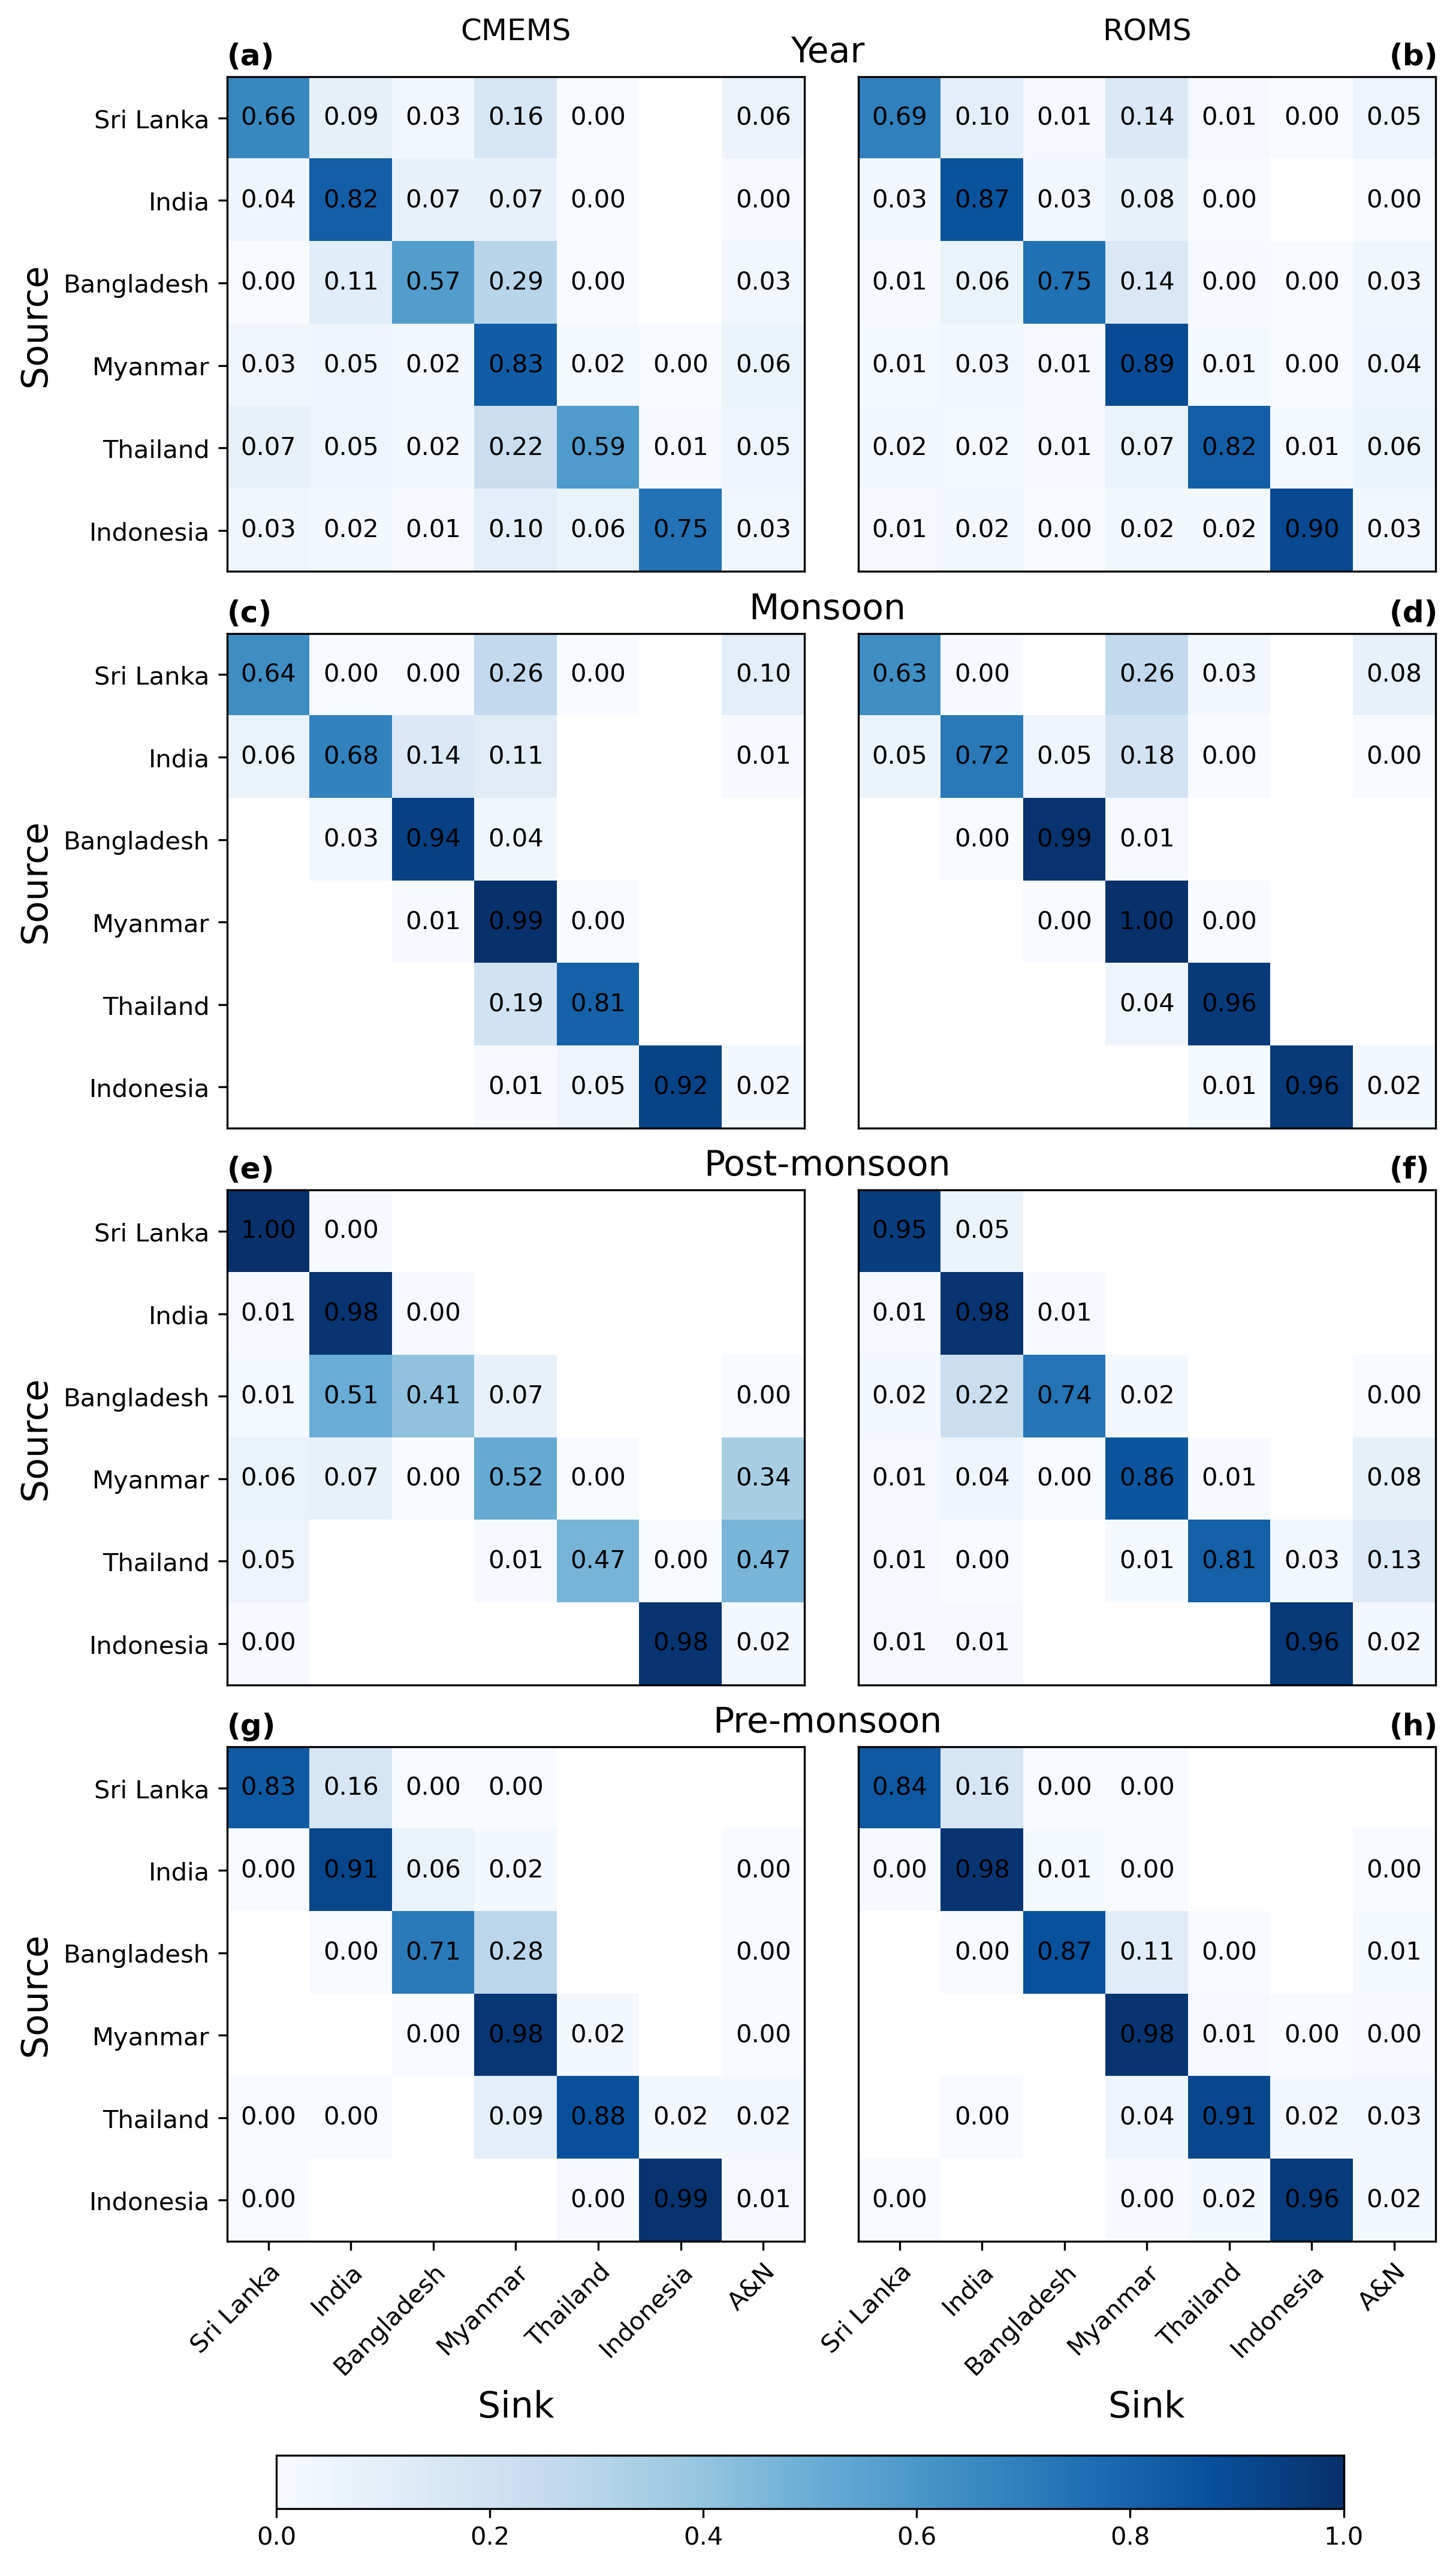

In [104]:
# Create a figure and axis objects with 4 rows and 2 columns
fig, axs = plt.subplots(4, 2, figsize=(8, 13), dpi=300)

# Add a title for each row
row_titles = ['Year', 'Monsoon', 'Post-monsoon', 'Pre-monsoon']
for ii, title in enumerate(row_titles):
    # Position the text outside of the subfigure on the right side
    axs[ii, 0].text(1.04, 1.05, title, ha='center', va='center', fontsize=14, transform=axs[ii, 0].transAxes)
    
m = plot_conn_mat_paper_noextras(axs[0,0], input_conn_mat_file_year_CMEMS)
plot_conn_mat_paper_noextras(axs[0,1], input_conn_mat_file_year_ROMS)
plot_conn_mat_paper_noextras(axs[1,0], input_conn_mat_file_monsoon_CMEMS)
plot_conn_mat_paper_noextras(axs[1,1], input_conn_mat_file_monsoon_ROMS)
plot_conn_mat_paper_noextras(axs[2,0], input_conn_mat_file_post_CMEMS)
plot_conn_mat_paper_noextras(axs[2,1], input_conn_mat_file_post_ROMS)
plot_conn_mat_paper_noextras(axs[3,0], input_conn_mat_file_pre_CMEMS)
plot_conn_mat_paper_noextras(axs[3,1], input_conn_mat_file_pre_ROMS)

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.2, top=0.9, wspace=0, hspace=None)

cbar = fig.colorbar(m, ax=axs[-1, :],location='bottom', cmap='Blues')

# Get the current position of the colorbar
pos = cbar.ax.get_position()
# Set the new position of the colorbar
cbar.ax.set_position([pos.x0-0.07, pos.y0-0.27, pos.width+0.2, pos.height])

axs[0,0].text(0, 1.07, "(a)", transform=axs[0,0].transAxes, fontsize=12, fontweight='bold', va='top')
axs[0,1].text(0.92, 1.07, "(b)", transform=axs[0,1].transAxes, fontsize=12, fontweight='bold', va='top')
axs[1,0].text(0, 1.07, "(c)", transform=axs[1,0].transAxes, fontsize=12, fontweight='bold', va='top')
axs[1,1].text(0.92, 1.07, "(d)", transform=axs[1,1].transAxes, fontsize=12, fontweight='bold', va='top')
axs[2,0].text(0, 1.07, "(e)", transform=axs[2,0].transAxes, fontsize=12, fontweight='bold', va='top')
axs[2,1].text(0.92, 1.07, "(f)", transform=axs[2,1].transAxes, fontsize=12, fontweight='bold', va='top')
axs[3,0].text(0, 1.07, "(g)", transform=axs[3,0].transAxes, fontsize=12, fontweight='bold', va='top')
axs[3,1].text(0.92, 1.07, "(h)", transform=axs[3,1].transAxes, fontsize=12, fontweight='bold', va='top')

axs[0,0].text(0.5, 1.12, "CMEMS", transform=axs[0,0].transAxes, fontsize=12, ha='center', va='top')
axs[0,1].text(0.5, 1.12, "ROMS", transform=axs[0,1].transAxes, fontsize=12, ha='center', va='top')

# Adjust spacing between subplots
plt.tight_layout()

fig.savefig("/gpfs/home/rpe16nbu/projects/ocpp_mo1/plots/paper_data/fig03", bbox_inches='tight', facecolor='white', transparent=False)


In [27]:
# Appendix
# Fig A1

In [28]:
def plot_particle_end_locs_CMEMS_noextras(ax, velocity_input_file, lon_p_end_SL, lon_p_end_India, lon_p_end_Bang, 
                                    lon_p_end_Myan, lon_p_end_Thai, lon_p_end_Indo, lat_p_end_SL, lat_p_end_India, 
                                          lat_p_end_Bang, lat_p_end_Myan, lat_p_end_Thai, lat_p_end_Indo, vmin, vmax):
    
    openfile_u = Dataset(velocity_input_file)
    lon_vec_u = openfile_u.variables['longitude']
    lat_vec_u = openfile_u.variables['latitude']
    time_u = openfile_u.variables['time']
    u =  openfile_u.variables['uo']
    v =  openfile_u.variables['vo']

    u_subset_start = u[0,0,:,:]
    u_subset_end= u[-1,0,:,:]
    v_subset_start = v[0,0,:,:]
    v_subset_end = v[-1,0,:,:]
    speed_subset_start = np.sqrt(np.abs(u_subset_start)**2 + np.abs(v_subset_start)**2)
    speed_subset_end = np.sqrt(np.abs(u_subset_end)**2 + np.abs(v_subset_end)**2)

    # create grids of coordinates rather than just lists
    lon_grid_u, lat_grid_u = np.meshgrid(lon_vec_u, lat_vec_u)

    # defining datetime objects for start and end time of simulation
    interval_type = 'hours'
    interval_num_start = int(time_u[0])
    interval_num_end = int(time_u[-1])

    origin_time_u = datetime.datetime.strptime('1950/01/01 00:00:00','%Y/%m/%d %H:%M:%S') # simulation time output is number of hours since 00:00:00 01-01-1950
    start_time_u = origin_time_u + datetime.timedelta(**{interval_type: interval_num_start}) # turns integers into a datetime object to be added to origin_time
    end_time_u = origin_time_u + datetime.timedelta(**{interval_type: interval_num_end})

#     m2 = ax.pcolormesh(lon_grid_u[:,:],lat_grid_u[:,:],speed_subset_end, cmap='Blues_r')#, vmin=-2, vmax =3) # mappable content
    m2 = ax.pcolormesh(lon_grid_u[:,:],lat_grid_u[:,:],speed_subset_end, cmap='Blues_r')#, vmin=-2, vmax =3) # mappable content
    ax.scatter(lon_p_end_SL[:], lat_p_end_SL[:],color='r', s=0.01)
    ax.scatter(lon_p_end_India[:], lat_p_end_India[:],color='yellow', s=0.01)
    ax.scatter(lon_p_end_Bang[:], lat_p_end_Bang[:],color='pink', s=0.01)
    ax.scatter(lon_p_end_Myan[:], lat_p_end_Myan[:],color='lime', s=0.01)
    ax.scatter(lon_p_end_Thai[:], lat_p_end_Thai[:],color='grey', s=0.01)
    ax.scatter(lon_p_end_Indo[:], lat_p_end_Indo[:],color='darkorange', s=0.01)
    m2.set_clim(0,max(np.amax(speed_subset_start),np.amax(speed_subset_end))) # same as setting vmin/vmax limits in countourf() or pcolormesh() line of code
    
    ax.xaxis.set_ticks_position('top')    
    if ax == axs[1,0]:
        ax.set_xticks([])
        ax.set_xticklabels([])


In [29]:
def plot_particle_end_locs_ROMS_hourly_noextras(ax, velocity_input_file, lon_p_end_SL, lon_p_end_India, lon_p_end_Bang, 
                                    lon_p_end_Myan, lon_p_end_Thai, lon_p_end_Indo, lat_p_end_SL, lat_p_end_India, 
                                                lat_p_end_Bang, lat_p_end_Myan, lat_p_end_Thai, lat_p_end_Indo, vmin, vmax):
    
    openfile_u = Dataset(velocity_input_file)
    lon_vec_u = openfile_u.variables['lon_u']
    lat_vec_u = openfile_u.variables['lat_u']
    lon_vec_v = openfile_u.variables['lon_v']
    lat_vec_v = openfile_u.variables['lat_v']
    time_u = openfile_u.variables['ocean_time']
    u =  openfile_u.variables['u']
    v =  openfile_u.variables['v']
    
    u_subset_start = u[0,0,:-1,:]
    u_subset_end= u[-1,0,:-1,:]
    v_subset_start = v[0,0,:,:-1]
    v_subset_end = v[-1,0,:,:-1]
    speed_subset_start = np.sqrt(np.abs(u_subset_start)**2 + np.abs(v_subset_start)**2)
    speed_subset_end = np.sqrt(np.abs(u_subset_end)**2 + np.abs(v_subset_end)**2)

    # # create grids of coordinates rather than just lists
    # lon_grid_u, lat_grid_u = np.meshgrid(lon_vec_u, lat_vec_u)
    lon_grid_u = lon_vec_u
    lat_grid_u = lat_vec_u
    lon_grid_u=lon_grid_u[:-1,:]
    lat_grid_u=lat_grid_u[:-1,:]

    # defining datetime objects for start and end time of simulation
    interval_type = 'seconds'
    interval_num_start = int(time_u[0])
    interval_num_end = int(time_u[-1])
    
    origin_time_u = datetime.datetime.strptime('2020-07-01 12:00:00','%Y-%m-%d %H:%M:%S') # simulation time output is number of hours since 00:00:00 01-01-1950
    start_time_u = origin_time_u + datetime.timedelta(**{interval_type: interval_num_start}) # turns integers into a datetime object to be added to origin_time
    end_time_u = origin_time_u + datetime.timedelta(**{interval_type: interval_num_end})

    
    m2 = ax.pcolormesh(lon_grid_u[:,:],lat_grid_u[:,:],speed_subset_end, cmap='Blues_r')#, vmin=-2, vmax =3) # mappable content
    ax.scatter(lon_p_end_SL[:], lat_p_end_SL[:],color='r', s=0.01)
    ax.scatter(lon_p_end_India[:], lat_p_end_India[:],color='yellow', s=0.01)
    ax.scatter(lon_p_end_Bang[:], lat_p_end_Bang[:],color='pink', s=0.01)
    ax.scatter(lon_p_end_Myan[:], lat_p_end_Myan[:],color='lime', s=0.01)
    ax.scatter(lon_p_end_Thai[:], lat_p_end_Thai[:],color='grey', s=0.01)
    ax.scatter(lon_p_end_Indo[:], lat_p_end_Indo[:],color='darkorange', s=0.01)
    m2.set_clim(0,max(np.amax(speed_subset_start),np.amax(speed_subset_end))) # same as setting vmin/vmax limits in countourf() or pcolormesh() line of code

    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.xaxis.set_ticks_position('top')

In [30]:
def plot_particle_end_locs_ROMS_daily_noextras(ax, velocity_u_input_file, velocity_v_input_file, lon_p_end_SL, lon_p_end_India, lon_p_end_Bang, 
                                    lon_p_end_Myan, lon_p_end_Thai, lon_p_end_Indo, lat_p_end_SL, lat_p_end_India, 
                                               lat_p_end_Bang, lat_p_end_Myan, lat_p_end_Thai, lat_p_end_Indo, vmin, vmax):
    
    openfile_u = Dataset(velocity_u_input_file)
    openfile_v = Dataset(velocity_v_input_file)
    lon_vec_u = openfile_u.variables['lon_u']
    lat_vec_u = openfile_u.variables['lat_u']
    lon_vec_v = openfile_v.variables['lon_v']
    lat_vec_v = openfile_v.variables['lat_v']
    time_u = openfile_u.variables['ocean_time']
    u =  openfile_u.variables['u']
    v =  openfile_v.variables['v']
    
    u_subset_start = u[0,0,:-1,:]
    u_subset_end= u[-1,0,:-1,:]
    v_subset_start = v[0,0,:,:-1]
    v_subset_end = v[-1,0,:,:-1]
    speed_subset_start = np.sqrt(np.abs(u_subset_start)**2 + np.abs(v_subset_start)**2)
    speed_subset_end = np.sqrt(np.abs(u_subset_end)**2 + np.abs(v_subset_end)**2)

    # # create grids of coordinates rather than just lists
    # lon_grid_u, lat_grid_u = np.meshgrid(lon_vec_u, lat_vec_u)
    lon_grid_u = lon_vec_u
    lat_grid_u = lat_vec_u
    lon_grid_u=lon_grid_u[:-1,:]
    lat_grid_u=lat_grid_u[:-1,:]

    # defining datetime objects for start and end time of simulation
    interval_type = 'seconds'
    interval_num_start = int(time_u[0])
    interval_num_end = int(time_u[-1])
    
    origin_time_u = datetime.datetime.strptime('2020-07-01 12:00:00','%Y-%m-%d %H:%M:%S') # simulation time output is number of hours since 00:00:00 01-01-1950
    start_time_u = origin_time_u + datetime.timedelta(**{interval_type: interval_num_start}) # turns integers into a datetime object to be added to origin_time
    end_time_u = origin_time_u + datetime.timedelta(**{interval_type: interval_num_end})

    
    m2 = ax.pcolormesh(lon_grid_u[:,:],lat_grid_u[:,:],speed_subset_end, cmap='Blues_r')#, vmin=-2, vmax =3) # mappable content
    ax.scatter(lon_p_end_SL[:], lat_p_end_SL[:],color='r', s=0.01)
    ax.scatter(lon_p_end_India[:], lat_p_end_India[:],color='yellow', s=0.01)
    ax.scatter(lon_p_end_Bang[:], lat_p_end_Bang[:],color='pink', s=0.01)
    ax.scatter(lon_p_end_Myan[:], lat_p_end_Myan[:],color='lime', s=0.01)
    ax.scatter(lon_p_end_Thai[:], lat_p_end_Thai[:],color='grey', s=0.01)
    ax.scatter(lon_p_end_Indo[:], lat_p_end_Indo[:],color='darkorange', s=0.01)
    m2.set_clim(0,max(np.amax(speed_subset_start),np.amax(speed_subset_end))) # same as setting vmin/vmax limits in countourf() or pcolormesh() line of code
    
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_yticklabels([])
    

In [31]:
def plot_conn_mat_diff_noextras(ax, input_conn_mat_file1, input_conn_mat_file2, vmin, vmax):
    conn_mat_df1 = pd.read_csv(input_conn_mat_file1, index_col=0)
    conn_mat_df2 = pd.read_csv(input_conn_mat_file2, index_col=0)
    conn_mat_df = conn_mat_df1 - conn_mat_df2
    conn_mat_df.replace(0.0, np.nan, inplace=True) # replace all zeros with NaNs, inplace=True changes it in the dataframe itself not in the variable created here.
    polygon_names_list_source = list(conn_mat_df1) # need to remove Andaman and Nicobar
    polygon_names_list_source = [polygon_names_list_source[x] for x in [0,1,2,3,4,5] ]
    polygon_names_list_sink = list(conn_mat_df1) # this prints out the column headings of the dataframe. For connectivity marices, the column and row headings are the same so I don't need to extract the row headings (which I think is more complicated...). I can just use the column headings as xticklabels and yticklabels

    #create figure
    m1 = ax.matshow(conn_mat_df, cmap='PRGn', vmin=vmin, vmax=vmax) # mappable content
    
    for (ii, jj), z in np.ndenumerate(conn_mat_df):
        if ~np.isnan(z):
            ax.text(jj, ii, '{:0.2f}'.format(z), ha='center', va='center')
 
    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(polygon_names_list_sink)), labels=polygon_names_list_sink)
    ax.set_yticks(np.arange(len(polygon_names_list_source)), labels=polygon_names_list_source)
    ax.xaxis.set_ticks_position('bottom')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

    if ax == axs[1,0]:
        ax.set_ylabel('Source', fontsize='x-large')
        ax.set_xticks([])
        ax.set_xticklabels([])
    elif ax == axs[2,1]:
        ax.set_xlabel('Sink', fontsize='x-large') 
        ax.set_yticks([])
        ax.set_yticklabels([])
    elif ax == axs[2,0]:
        ax.set_xlabel('Sink', fontsize='x-large')   
        ax.set_ylabel('Source', fontsize='x-large')
    elif ax == axs[1,1]:
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xticklabels([])
        ax.set_yticklabels([])
    elif ax == axs[0,1]:
        ax.set_yticks([])
        ax.set_yticklabels([])
        ax.set_xticks([])
        ax.set_xticklabels([])
    elif ax == axs[0,0]:
        ax.set_xticks([])
        ax.set_xticklabels([])
        ax.set_ylabel('Source', fontsize='x-large')
        


In [32]:
# velocity files
velocity_input_file_Chourly = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/input/processed/paper_data/ocean_velocities_July2020_hourly.nc'
velocity_input_file_Cdaily = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/input/processed/paper_data/ocean_velocities_July2020_daily.nc'

velocity_input_file_Rhourly = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/input/processed/paper_data/ocean_velocities_ROMS_July2020_hourly.nc'
velocity_u_input_file_Rdaily = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/input/processed/paper_data/ocean_velocities_u_ROMS_July2020_daily.nc'
velocity_v_input_file_Rdaily = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/input/processed/paper_data/ocean_velocities_v_ROMS_July2020_daily.nc'


In [33]:
# particle files
input_pfile_SL_Chourly = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/output/paper_data/BoB_SL_uniform_Cop_hourly_July2020.nc'
input_pfile_India_Chourly = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/output/paper_data/BoB_India_uniform_Cop_hourly_July2020.nc'
input_pfile_Bang_Chourly = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/output/paper_data/BoB_Bang_uniform_Cop_hourly_July2020.nc'
input_pfile_Myan_Chourly = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/output/paper_data/BoB_Myan_uniform_Cop_hourly_July2020.nc'
input_pfile_Thai_Chourly = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/output/paper_data/BoB_Thai_uniform_Cop_hourly_July2020.nc'
input_pfile_Indo_Chourly = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/output/paper_data/BoB_Indonesia_uniform_Cop_hourly_July2020.nc'

input_pfile_SL_Cdaily = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/output/paper_data/BoB_SL_uniform_Cop_daily_July2020.nc'
input_pfile_India_Cdaily = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/output/paper_data/BoB_India_uniform_Cop_daily_July2020.nc'
input_pfile_Bang_Cdaily = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/output/paper_data/BoB_Bang_uniform_Cop_daily_July2020.nc'
input_pfile_Myan_Cdaily = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/output/paper_data/BoB_Myan_uniform_Cop_daily_July2020.nc'
input_pfile_Thai_Cdaily = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/output/paper_data/BoB_Thai_uniform_Cop_daily_July2020.nc'
input_pfile_Indo_Cdaily = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/output/paper_data/BoB_Indonesia_uniform_Cop_daily_July2020.nc'

input_pfile_SL_Rhourly = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/output/paper_data/BoB_SL_uniform_ROMS_hourly_July2020.nc'
input_pfile_India_Rhourly = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/output/paper_data/BoB_India_uniform_ROMS_hourly_July2020.nc'
input_pfile_Bang_Rhourly = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/output/paper_data/BoB_Bang_uniform_ROMS_hourly_July2020.nc'
input_pfile_Myan_Rhourly = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/output/paper_data/BoB_Myan_uniform_ROMS_hourly_July2020.nc'
input_pfile_Thai_Rhourly = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/output/paper_data/BoB_Thai_uniform_ROMS_hourly_July2020.nc'
input_pfile_Indo_Rhourly = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/output/paper_data/BoB_Indonesia_uniform_ROMS_hourly_July2020.nc'

input_pfile_SL_Rdaily = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/output/paper_data/BoB_SL_uniform_ROMS_daily_July2020.nc'
input_pfile_India_Rdaily = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/output/paper_data/BoB_India_uniform_ROMS_daily_July2020.nc'
input_pfile_Bang_Rdaily = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/output/paper_data/BoB_Bang_uniform_ROMS_daily_July2020.nc'
input_pfile_Myan_Rdaily = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/output/paper_data/BoB_Myan_uniform_ROMS_daily_July2020.nc'
input_pfile_Thai_Rdaily = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/output/paper_data/BoB_Thai_uniform_ROMS_daily_July2020.nc'
input_pfile_Indo_Rdaily = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/output/paper_data/BoB_Indonesia_uniform_ROMS_daily_July2020.nc'


In [34]:
openfile_p9_CH = Dataset(input_pfile_SL_Chourly)
lon_p_SL_CH = openfile_p9_CH.variables['lon']
lat_p_SL_CH = openfile_p9_CH.variables['lat']
time_p_SL_CH = openfile_p9_CH.variables['time']
openfile_p10_CH = Dataset(input_pfile_India_Chourly)
lon_p_India_CH = openfile_p10_CH.variables['lon']
lat_p_India_CH = openfile_p10_CH.variables['lat']
openfile_p11_CH = Dataset(input_pfile_Bang_Chourly)
lon_p_Bang_CH = openfile_p11_CH.variables['lon']
lat_p_Bang_CH = openfile_p11_CH.variables['lat']
openfile_p12_CH = Dataset(input_pfile_Myan_Chourly)
lon_p_Myan_CH = openfile_p12_CH.variables['lon']
lat_p_Myan_CH = openfile_p12_CH.variables['lat']
openfile_p13_CH = Dataset(input_pfile_Thai_Chourly)
lon_p_Thai_CH = openfile_p13_CH.variables['lon']
lat_p_Thai_CH = openfile_p13_CH.variables['lat']
openfile_p14_CH = Dataset(input_pfile_Indo_Chourly)
lon_p_Indo_CH = openfile_p14_CH.variables['lon']
lat_p_Indo_CH = openfile_p14_CH.variables['lat']
        
lon_p_end_SL_CH = np.zeros(len(lon_p_SL_CH))
lat_p_end_SL_CH = np.zeros(len(lat_p_SL_CH))
for ii in range(len(lon_p_SL_CH)):
    lon_temp = lon_p_SL_CH[ii,:]
    lat_temp = lat_p_SL_CH[ii,:]
    for jj in range(len(lon_temp)):
        if not lon_temp[jj].data==0:
                lon_p_end_SL_CH[ii] = lon_temp[jj]
        if not lat_temp[jj].data==0:
                lat_p_end_SL_CH[ii] = lat_temp[jj]
                
lon_p_end_India_CH = np.zeros(len(lon_p_India_CH))
lat_p_end_India_CH = np.zeros(len(lat_p_India_CH))
for ii in range(len(lon_p_India_CH)):
    lon_temp = lon_p_India_CH[ii,:]
    lat_temp = lat_p_India_CH[ii,:]
    for jj in range(len(lon_temp)):
        if not lon_temp[jj].data==0:
               lon_p_end_India_CH[ii] = lon_temp[jj]
        if not lat_temp[jj].data==0:
               lat_p_end_India_CH[ii] = lat_temp[jj]

lon_p_end_Bang_CH = np.zeros(len(lon_p_Bang_CH))
lat_p_end_Bang_CH = np.zeros(len(lat_p_Bang_CH))
for ii in range(len(lon_p_Bang_CH)):
    lon_temp = lon_p_Bang_CH[ii,:]
    lat_temp = lat_p_Bang_CH[ii,:]
    for jj in range(len(lon_temp)):
        if not lon_temp[jj].data==0:
               lon_p_end_Bang_CH[ii] = lon_temp[jj]
        if not lat_temp[jj].data==0:
               lat_p_end_Bang_CH[ii] = lat_temp[jj]

lon_p_end_Myan_CH = np.zeros(len(lon_p_Myan_CH))
lat_p_end_Myan_CH = np.zeros(len(lat_p_Myan_CH))
for ii in range(len(lon_p_Myan_CH)):
    lon_temp = lon_p_Myan_CH[ii,:]
    lat_temp = lat_p_Myan_CH[ii,:]
    for jj in range(len(lon_temp)):
        if not lon_temp[jj].data==0:
               lon_p_end_Myan_CH[ii] = lon_temp[jj]
        if not lat_temp[jj].data==0:
               lat_p_end_Myan_CH[ii] = lat_temp[jj]

lon_p_end_Thai_CH = np.zeros(len(lon_p_Thai_CH))
lat_p_end_Thai_CH = np.zeros(len(lat_p_Thai_CH))
for ii in range(len(lon_p_Thai_CH)):
    lon_temp = lon_p_Thai_CH[ii,:]
    lat_temp = lat_p_Thai_CH[ii,:]
    for jj in range(len(lon_temp)):
        if not lon_temp[jj].data==0:
               lon_p_end_Thai_CH[ii] = lon_temp[jj]
        if not lat_temp[jj].data==0:
               lat_p_end_Thai_CH[ii] = lat_temp[jj]
    
lon_p_end_Indo_CH = np.zeros(len(lon_p_Indo_CH))
lat_p_end_Indo_CH = np.zeros(len(lat_p_Indo_CH))
for ii in range(len(lon_p_Indo_CH)):
    lon_temp = lon_p_Indo_CH[ii,:]
    lat_temp = lat_p_Indo_CH[ii,:]
    for jj in range(len(lon_temp)):
        if not lon_temp[jj].data==0:
               lon_p_end_Indo_CH[ii] = lon_temp[jj]
        if not lat_temp[jj].data==0:
               lat_p_end_Indo_CH[ii] = lat_temp[jj]


In [35]:
openfile_p9_CD = Dataset(input_pfile_SL_Cdaily)
lon_p_SL_CD = openfile_p9_CD.variables['lon']
lat_p_SL_CD = openfile_p9_CD.variables['lat']
time_p_SL_CD = openfile_p9_CD.variables['time']
openfile_p10_CD = Dataset(input_pfile_India_Cdaily)
lon_p_India_CD = openfile_p10_CD.variables['lon']
lat_p_India_CD = openfile_p10_CD.variables['lat']
openfile_p11_CD = Dataset(input_pfile_Bang_Cdaily)
lon_p_Bang_CD = openfile_p11_CD.variables['lon']
lat_p_Bang_CD = openfile_p11_CD.variables['lat']
openfile_p12_CD = Dataset(input_pfile_Myan_Cdaily)
lon_p_Myan_CD = openfile_p12_CD.variables['lon']
lat_p_Myan_CD = openfile_p12_CD.variables['lat']
openfile_p13_CD = Dataset(input_pfile_Thai_Cdaily)
lon_p_Thai_CD = openfile_p13_CD.variables['lon']
lat_p_Thai_CD = openfile_p13_CD.variables['lat']
openfile_p14_CD = Dataset(input_pfile_Indo_Cdaily)
lon_p_Indo_CD = openfile_p14_CD.variables['lon']
lat_p_Indo_CD = openfile_p14_CD.variables['lat']
        
lon_p_end_SL_CD = np.zeros(len(lon_p_SL_CD))
lat_p_end_SL_CD = np.zeros(len(lat_p_SL_CD))
for ii in range(len(lon_p_SL_CD)):
    lon_temp = lon_p_SL_CD[ii,:]
    lat_temp = lat_p_SL_CD[ii,:]
    for jj in range(len(lon_temp)):
        if not lon_temp[jj].data==0:
                lon_p_end_SL_CD[ii] = lon_temp[jj]
        if not lat_temp[jj].data==0:
                lat_p_end_SL_CD[ii] = lat_temp[jj]
                
lon_p_end_India_CD = np.zeros(len(lon_p_India_CD))
lat_p_end_India_CD = np.zeros(len(lat_p_India_CD))
for ii in range(len(lon_p_India_CD)):
    lon_temp = lon_p_India_CD[ii,:]
    lat_temp = lat_p_India_CD[ii,:]
    for jj in range(len(lon_temp)):
        if not lon_temp[jj].data==0:
               lon_p_end_India_CD[ii] = lon_temp[jj]
        if not lat_temp[jj].data==0:
               lat_p_end_India_CD[ii] = lat_temp[jj]

lon_p_end_Bang_CD = np.zeros(len(lon_p_Bang_CD))
lat_p_end_Bang_CD = np.zeros(len(lat_p_Bang_CD))
for ii in range(len(lon_p_Bang_CD)):
    lon_temp = lon_p_Bang_CD[ii,:]
    lat_temp = lat_p_Bang_CD[ii,:]
    for jj in range(len(lon_temp)):
        if not lon_temp[jj].data==0:
               lon_p_end_Bang_CD[ii] = lon_temp[jj]
        if not lat_temp[jj].data==0:
               lat_p_end_Bang_CD[ii] = lat_temp[jj]

lon_p_end_Myan_CD = np.zeros(len(lon_p_Myan_CD))
lat_p_end_Myan_CD = np.zeros(len(lat_p_Myan_CD))
for ii in range(len(lon_p_Myan_CD)):
    lon_temp = lon_p_Myan_CD[ii,:]
    lat_temp = lat_p_Myan_CD[ii,:]
    for jj in range(len(lon_temp)):
        if not lon_temp[jj].data==0:
               lon_p_end_Myan_CD[ii] = lon_temp[jj]
        if not lat_temp[jj].data==0:
               lat_p_end_Myan_CD[ii] = lat_temp[jj]

lon_p_end_Thai_CD = np.zeros(len(lon_p_Thai_CD))
lat_p_end_Thai_CD = np.zeros(len(lat_p_Thai_CD))
for ii in range(len(lon_p_Thai_CD)):
    lon_temp = lon_p_Thai_CD[ii,:]
    lat_temp = lat_p_Thai_CD[ii,:]
    for jj in range(len(lon_temp)):
        if not lon_temp[jj].data==0:
               lon_p_end_Thai_CD[ii] = lon_temp[jj]
        if not lat_temp[jj].data==0:
               lat_p_end_Thai_CD[ii] = lat_temp[jj]
    
lon_p_end_Indo_CD = np.zeros(len(lon_p_Indo_CD))
lat_p_end_Indo_CD = np.zeros(len(lat_p_Indo_CD))
for ii in range(len(lon_p_Indo_CD)):
    lon_temp = lon_p_Indo_CD[ii,:]
    lat_temp = lat_p_Indo_CD[ii,:]
    for jj in range(len(lon_temp)):
        if not lon_temp[jj].data==0:
               lon_p_end_Indo_CD[ii] = lon_temp[jj]
        if not lat_temp[jj].data==0:
               lat_p_end_Indo_CD[ii] = lat_temp[jj]



In [36]:
openfile_p9_RD = Dataset(input_pfile_SL_Rdaily)
lon_p_SL_RD = openfile_p9_RD.variables['lon']
lat_p_SL_RD = openfile_p9_RD.variables['lat']
time_p_SL_RD = openfile_p9_RD.variables['time']
openfile_p10_RD = Dataset(input_pfile_India_Rdaily)
lon_p_India_RD = openfile_p10_RD.variables['lon']
lat_p_India_RD = openfile_p10_RD.variables['lat']
openfile_p11_RD = Dataset(input_pfile_Bang_Rdaily)
lon_p_Bang_RD = openfile_p11_RD.variables['lon']
lat_p_Bang_RD = openfile_p11_RD.variables['lat']
openfile_p12_RD = Dataset(input_pfile_Myan_Rdaily)
lon_p_Myan_RD = openfile_p12_RD.variables['lon']
lat_p_Myan_RD = openfile_p12_RD.variables['lat']
openfile_p13_RD = Dataset(input_pfile_Thai_Rdaily)
lon_p_Thai_RD = openfile_p13_RD.variables['lon']
lat_p_Thai_RD = openfile_p13_RD.variables['lat']
openfile_p14_RD = Dataset(input_pfile_Indo_Rdaily)
lon_p_Indo_RD = openfile_p14_RD.variables['lon']
lat_p_Indo_RD = openfile_p14_RD.variables['lat']
        
lon_p_end_SL_RD = np.zeros(len(lon_p_SL_RD))
lat_p_end_SL_RD = np.zeros(len(lat_p_SL_RD))
for ii in range(len(lon_p_SL_RD)):
    lon_temp = lon_p_SL_RD[ii,:]
    lat_temp = lat_p_SL_RD[ii,:]
    for jj in range(len(lon_temp)):
        if not lon_temp[jj].data==0:
                lon_p_end_SL_RD[ii] = lon_temp[jj]
        if not lat_temp[jj].data==0:
                lat_p_end_SL_RD[ii] = lat_temp[jj]
                
lon_p_end_India_RD = np.zeros(len(lon_p_India_RD))
lat_p_end_India_RD = np.zeros(len(lat_p_India_RD))
for ii in range(len(lon_p_India_RD)):
    lon_temp = lon_p_India_RD[ii,:]
    lat_temp = lat_p_India_RD[ii,:]
    for jj in range(len(lon_temp)):
        if not lon_temp[jj].data==0:
               lon_p_end_India_RD[ii] = lon_temp[jj]
        if not lat_temp[jj].data==0:
               lat_p_end_India_RD[ii] = lat_temp[jj]

lon_p_end_Bang_RD = np.zeros(len(lon_p_Bang_RD))
lat_p_end_Bang_RD = np.zeros(len(lat_p_Bang_RD))
for ii in range(len(lon_p_Bang_RD)):
    lon_temp = lon_p_Bang_RD[ii,:]
    lat_temp = lat_p_Bang_RD[ii,:]
    for jj in range(len(lon_temp)):
        if not lon_temp[jj].data==0:
               lon_p_end_Bang_RD[ii] = lon_temp[jj]
        if not lat_temp[jj].data==0:
               lat_p_end_Bang_RD[ii] = lat_temp[jj]

lon_p_end_Myan_RD = np.zeros(len(lon_p_Myan_RD))
lat_p_end_Myan_RD = np.zeros(len(lat_p_Myan_RD))
for ii in range(len(lon_p_Myan_RD)):
    lon_temp = lon_p_Myan_RD[ii,:]
    lat_temp = lat_p_Myan_RD[ii,:]
    for jj in range(len(lon_temp)):
        if not lon_temp[jj].data==0:
               lon_p_end_Myan_RD[ii] = lon_temp[jj]
        if not lat_temp[jj].data==0:
               lat_p_end_Myan_RD[ii] = lat_temp[jj]

lon_p_end_Thai_RD = np.zeros(len(lon_p_Thai_RD))
lat_p_end_Thai_RD = np.zeros(len(lat_p_Thai_RD))
for ii in range(len(lon_p_Thai_RD)):
    lon_temp = lon_p_Thai_RD[ii,:]
    lat_temp = lat_p_Thai_RD[ii,:]
    for jj in range(len(lon_temp)):
        if not lon_temp[jj].data==0:
               lon_p_end_Thai_RD[ii] = lon_temp[jj]
        if not lat_temp[jj].data==0:
               lat_p_end_Thai_RD[ii] = lat_temp[jj]
    
lon_p_end_Indo_RD = np.zeros(len(lon_p_Indo_RD))
lat_p_end_Indo_RD = np.zeros(len(lat_p_Indo_RD))
for ii in range(len(lon_p_Indo_RD)):
    lon_temp = lon_p_Indo_RD[ii,:]
    lat_temp = lat_p_Indo_RD[ii,:]
    for jj in range(len(lon_temp)):
        if not lon_temp[jj].data==0:
               lon_p_end_Indo_RD[ii] = lon_temp[jj]
        if not lat_temp[jj].data==0:
               lat_p_end_Indo_RD[ii] = lat_temp[jj]


In [37]:
openfile_p9_RH = Dataset(input_pfile_SL_Rhourly)
lon_p_SL_RH = openfile_p9_RH.variables['lon']
lat_p_SL_RH = openfile_p9_RH.variables['lat']
time_p_SL_RH = openfile_p9_RH.variables['time']
openfile_p10_RH = Dataset(input_pfile_India_Rhourly)
lon_p_India_RH = openfile_p10_RH.variables['lon']
lat_p_India_RH = openfile_p10_RH.variables['lat']
openfile_p11_RH = Dataset(input_pfile_Bang_Rhourly)
lon_p_Bang_RH = openfile_p11_RH.variables['lon']
lat_p_Bang_RH = openfile_p11_RH.variables['lat']
openfile_p12_RH = Dataset(input_pfile_Myan_Rhourly)
lon_p_Myan_RH = openfile_p12_RH.variables['lon']
lat_p_Myan_RH = openfile_p12_RH.variables['lat']
openfile_p13_RH = Dataset(input_pfile_Thai_Rhourly)
lon_p_Thai_RH = openfile_p13_RH.variables['lon']
lat_p_Thai_RH = openfile_p13_RH.variables['lat']
openfile_p14_RH = Dataset(input_pfile_Indo_Rhourly)
lon_p_Indo_RH = openfile_p14_RH.variables['lon']
lat_p_Indo_RH = openfile_p14_RH.variables['lat']
        
lon_p_end_SL_RH = np.zeros(len(lon_p_SL_RH))
lat_p_end_SL_RH = np.zeros(len(lat_p_SL_RH))
for ii in range(len(lon_p_SL_RH)):
    lon_temp = lon_p_SL_RH[ii,:]
    lat_temp = lat_p_SL_RH[ii,:]
    for jj in range(len(lon_temp)):
        if not lon_temp[jj].data==0:
                lon_p_end_SL_RH[ii] = lon_temp[jj]
        if not lat_temp[jj].data==0:
                lat_p_end_SL_RH[ii] = lat_temp[jj]
                
lon_p_end_India_RH = np.zeros(len(lon_p_India_RH))
lat_p_end_India_RH = np.zeros(len(lat_p_India_RH))
for ii in range(len(lon_p_India_RH)):
    lon_temp = lon_p_India_RH[ii,:]
    lat_temp = lat_p_India_RH[ii,:]
    for jj in range(len(lon_temp)):
        if not lon_temp[jj].data==0:
               lon_p_end_India_RH[ii] = lon_temp[jj]
        if not lat_temp[jj].data==0:
               lat_p_end_India_RH[ii] = lat_temp[jj]

lon_p_end_Bang_RH = np.zeros(len(lon_p_Bang_RH))
lat_p_end_Bang_RH = np.zeros(len(lat_p_Bang_RH))
for ii in range(len(lon_p_Bang_RH)):
    lon_temp = lon_p_Bang_RH[ii,:]
    lat_temp = lat_p_Bang_RH[ii,:]
    for jj in range(len(lon_temp)):
        if not lon_temp[jj].data==0:
               lon_p_end_Bang_RH[ii] = lon_temp[jj]
        if not lat_temp[jj].data==0:
               lat_p_end_Bang_RH[ii] = lat_temp[jj]

lon_p_end_Myan_RH = np.zeros(len(lon_p_Myan_RH))
lat_p_end_Myan_RH = np.zeros(len(lat_p_Myan_RH))
for ii in range(len(lon_p_Myan_RH)):
    lon_temp = lon_p_Myan_RH[ii,:]
    lat_temp = lat_p_Myan_RH[ii,:]
    for jj in range(len(lon_temp)):
        if not lon_temp[jj].data==0:
               lon_p_end_Myan_RH[ii] = lon_temp[jj]
        if not lat_temp[jj].data==0:
               lat_p_end_Myan_RH[ii] = lat_temp[jj]

lon_p_end_Thai_RH = np.zeros(len(lon_p_Thai_RH))
lat_p_end_Thai_RH = np.zeros(len(lat_p_Thai_RH))
for ii in range(len(lon_p_Thai_RH)):
    lon_temp = lon_p_Thai_RH[ii,:]
    lat_temp = lat_p_Thai_RH[ii,:]
    for jj in range(len(lon_temp)):
        if not lon_temp[jj].data==0:
               lon_p_end_Thai_RH[ii] = lon_temp[jj]
        if not lat_temp[jj].data==0:
               lat_p_end_Thai_RH[ii] = lat_temp[jj]
    
lon_p_end_Indo_RH = np.zeros(len(lon_p_Indo_RH))
lat_p_end_Indo_RH = np.zeros(len(lat_p_Indo_RH))
for ii in range(len(lon_p_Indo_RH)):
    lon_temp = lon_p_Indo_RH[ii,:]
    lat_temp = lat_p_Indo_RH[ii,:]
    for jj in range(len(lon_temp)):
        if not lon_temp[jj].data==0:
               lon_p_end_Indo_RH[ii] = lon_temp[jj]
        if not lat_temp[jj].data==0:
               lat_p_end_Indo_RH[ii] = lat_temp[jj]


In [38]:
vminC = 0
vmaxC = 2.25
vminR = 0
vmaxR = 2.25

In [77]:
#connectivity matrices
Cop_hourly_July2020 = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/output/paper_data/connectivity/conn_mat6x7_norm_BoB_uniform_Cop_hourly_July2020.csv'
Cop_daily_July2020 = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/output/paper_data/connectivity/conn_mat6x7_norm_BoB_uniform_Cop_daily_July2020.csv'
ROMS_hourly_July2020 = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/output/paper_data/connectivity/conn_mat6x7_norm_BoB_uniform_ROMS_hourly_July2020.csv'
ROMS_daily_July2020 = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/output/paper_data/connectivity/conn_mat6x7_norm_BoB_uniform_ROMS_daily_July2020.csv'


/tmp/ipykernel_8796/4281424050.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  axs[0, 0] = plt.subplot(3, 2, 1, projection=ccrs.PlateCarree())
/tmp/ipykernel_8796/4281424050.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  axs[0, 1] = plt.subplot(3, 2, 2, projection=ccrs.PlateCarree())
/tmp/ipykernel_8796/4281424050.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  axs[1, 0] = plt.subplot(3, 2, 3, projection=ccrs.PlateCarree())
/tmp/ipykernel_8796/4281424050.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; expli

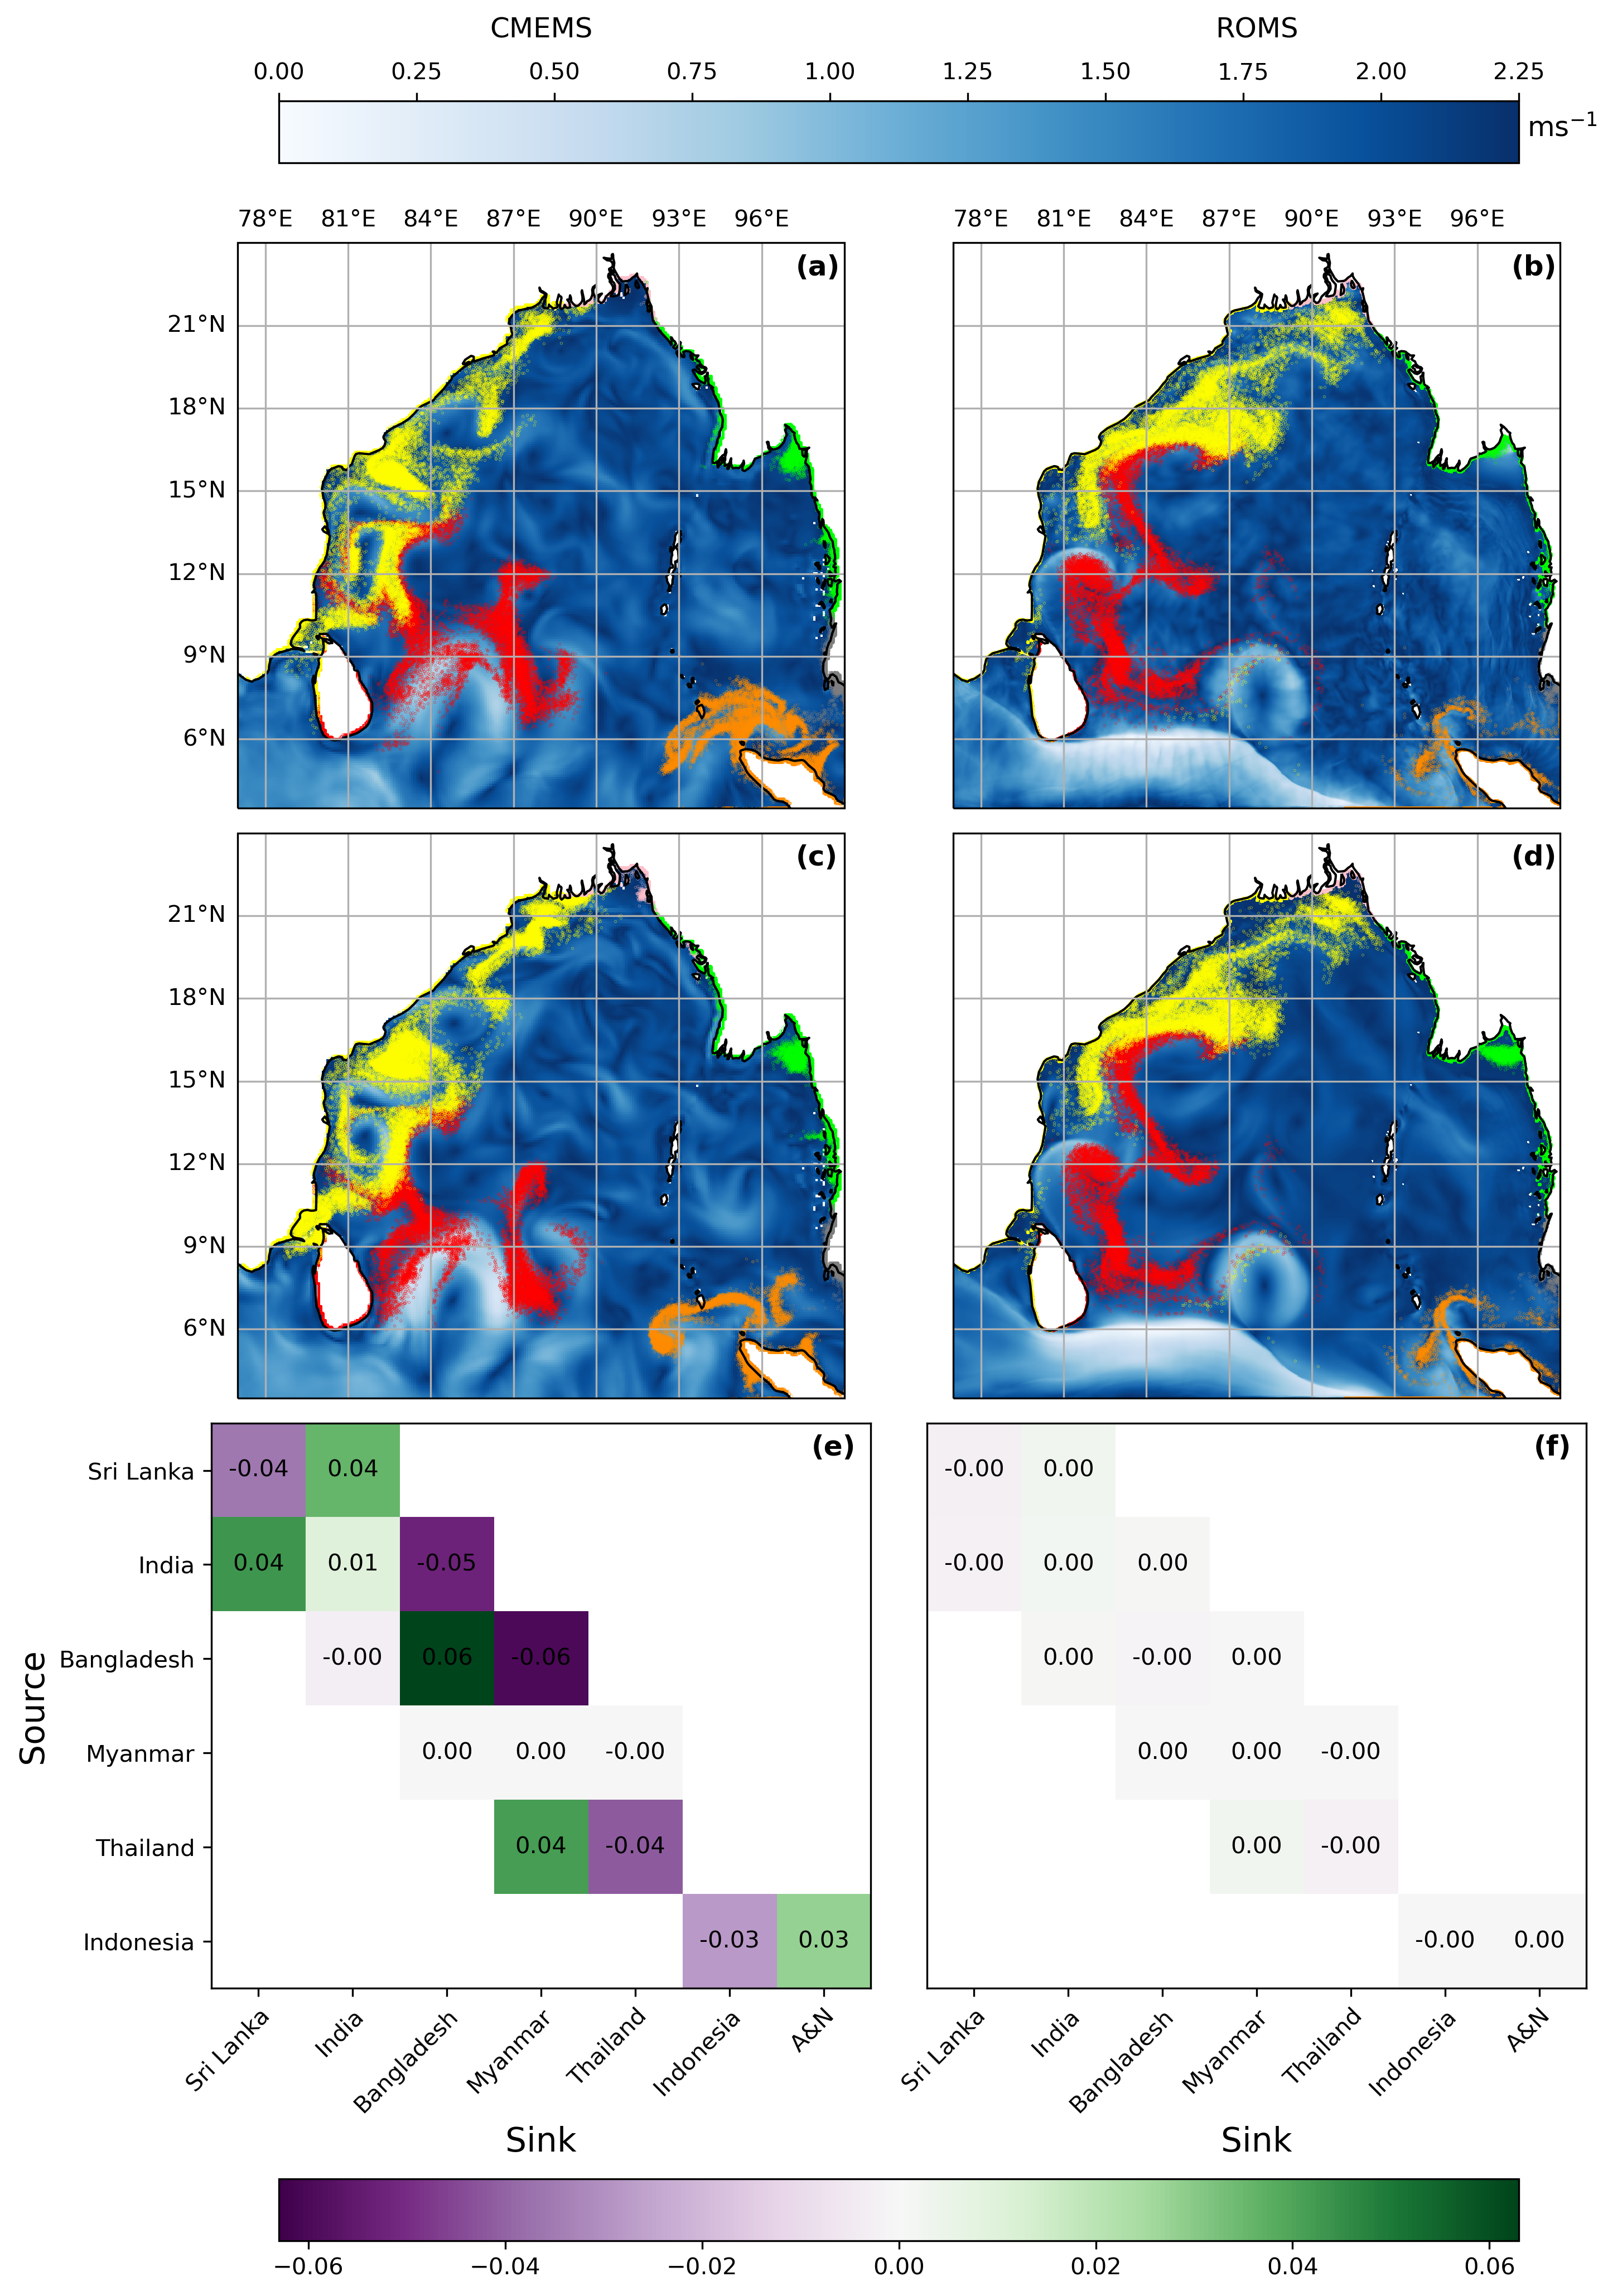

In [105]:
fig, axs = plt.subplots(3, 2, figsize=(10, 12), dpi=300)
# Modify the axes that require a Cartopy projection
axs[0, 0] = plt.subplot(3, 2, 1, projection=ccrs.PlateCarree())
axs[0, 1] = plt.subplot(3, 2, 2, projection=ccrs.PlateCarree())
axs[1, 0] = plt.subplot(3, 2, 3, projection=ccrs.PlateCarree())
axs[1, 1] = plt.subplot(3, 2, 4, projection=ccrs.PlateCarree())
axs[0, 0].set_extent([77, 99, 3.5, 24])  # BoB domain
axs[0, 1].set_extent([77, 99, 3.5, 24])
axs[1, 0].set_extent([77, 99, 3.5, 24])
axs[1, 1].set_extent([77, 99, 3.5, 24])

m2 = plot_particle_end_locs_CMEMS_noextras(axs[0,0], velocity_input_file_Chourly, lon_p_end_SL_CH, lon_p_end_India_CH, lon_p_end_Bang_CH, 
                                    lon_p_end_Myan_CH, lon_p_end_Thai_CH, lon_p_end_Indo_CH, lat_p_end_SL_CH, lat_p_end_India_CH, lat_p_end_Bang_CH, 
                                          lat_p_end_Myan_CH, lat_p_end_Thai_CH, lat_p_end_Indo_CH, vminR, vmaxR)
plot_particle_end_locs_ROMS_hourly_noextras(axs[0,1], velocity_input_file_Rhourly, lon_p_end_SL_RH, lon_p_end_India_RH, lon_p_end_Bang_RH, 
                                    lon_p_end_Myan_RH, lon_p_end_Thai_RH, lon_p_end_Indo_RH, lat_p_end_SL_RH, lat_p_end_India_RH, lat_p_end_Bang_RH, 
                                     lat_p_end_Myan_RH, lat_p_end_Thai_RH, lat_p_end_Indo_RH, vminR, vmaxR)
plot_particle_end_locs_CMEMS_noextras(axs[1,0], velocity_input_file_Cdaily, lon_p_end_SL_CD, lon_p_end_India_CD, lon_p_end_Bang_CD, 
                                    lon_p_end_Myan_CD, lon_p_end_Thai_CD, lon_p_end_Indo_CD, lat_p_end_SL_CD, lat_p_end_India_CD, lat_p_end_Bang_CD, 
                                      lat_p_end_Myan_CD, lat_p_end_Thai_CD, lat_p_end_Indo_CD, vminR, vmaxR)
plot_particle_end_locs_ROMS_daily_noextras(axs[1,1], velocity_u_input_file_Rdaily, velocity_v_input_file_Rdaily, lon_p_end_SL_RD, lon_p_end_India_RD, lon_p_end_Bang_RD, 
                                    lon_p_end_Myan_RD, lon_p_end_Thai_RD, lon_p_end_Indo_RD, lat_p_end_SL_RD, lat_p_end_India_RD, lat_p_end_Bang_RD, 
                                     lat_p_end_Myan_RD, lat_p_end_Thai_RD, lat_p_end_Indo_RD, vminR, vmaxR)
m1 = plot_conn_mat_diff_noextras(axs[2,0], Cop_hourly_July2020, Cop_daily_July2020, vmin=-0.063,vmax=0.063)
plot_conn_mat_diff_noextras(axs[2,1], ROMS_hourly_July2020, ROMS_daily_July2020, vmin=-0.063,vmax=0.063)

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.2, top=0.9, wspace=0, hspace=None)

norm = plt.Normalize(vmin=-0.063, vmax=0.063)
cbar = fig.colorbar(m1, ax=axs[-1, :],location='bottom', cmap='PRGn', norm=norm)
# Get the current position of the colorbar
pos = cbar.ax.get_position()
# Set the new position of the colorbar
cbar.ax.set_position([pos.x0-0.06, pos.y0-0.29, pos.width+0.12, pos.height])

norm2 = plt.Normalize(vmin=vminR, vmax=vmaxR)
cbar2 = fig.colorbar(m2, ax=axs[-1, :],location='top', cmap='Blues', norm=norm2)
# Get the current position of the colorbar
pos2 = cbar.ax.get_position()
# Set the new position of the colorbar
cbar2.ax.set_position([pos.x0-0.06, pos.y0+0.745, pos.width+0.12, pos.height])
cbar2.set_label(r'ms$^{-1}$', fontsize=12, x=1.035, labelpad=-32)

axs[0,0].text(0.92, 0.98, "(a)", transform=axs[0,0].transAxes, fontsize=12, fontweight='bold', va='top')
axs[0,1].text(0.92, 0.98, "(b)", transform=axs[0,1].transAxes, fontsize=12, fontweight='bold', va='top')
axs[1,0].text(0.92, 0.98, "(c)", transform=axs[1,0].transAxes, fontsize=12, fontweight='bold', va='top')
axs[1,1].text(0.92, 0.98, "(d)", transform=axs[1,1].transAxes, fontsize=12, fontweight='bold', va='top')
axs[2,0].text(0.91, 0.98, "(e)", transform=axs[2,0].transAxes, fontsize=12, fontweight='bold', va='top')
axs[2,1].text(0.92, 0.98, "(f)", transform=axs[2,1].transAxes, fontsize=12, fontweight='bold', va='top')

axs[0,0].text(0.5, 1.4, "CMEMS", transform=axs[0,0].transAxes, fontsize=12, ha='center', va='top')
axs[0,1].text(0.5, 1.4, "ROMS", transform=axs[0,1].transAxes, fontsize=12, ha='center', va='top')

# Adjust spacing between subplots
plt.tight_layout()

axs[0, 0].coastlines()  # Add coastlines to the subplot
gl1 = axs[0, 0].gridlines(draw_labels=True)  # Add gridlines and enable labels
gl1.bottom_labels = False  # Disable labels at the top
gl1.right_labels = False  # Disable labels on the right

axs[0, 1].coastlines()  # Add coastlines to the subplot
gl2 = axs[0, 1].gridlines(draw_labels=True)  # Add gridlines and enable labels
gl2.bottom_labels = False  # Disable labels at the top
gl2.right_labels = False  # Disable labels on the right
gl2.left_labels = False

axs[1, 0].coastlines()  # Add coastlines to the subplot
gl3 = axs[1, 0].gridlines(draw_labels=True)  # Add gridlines and enable labels
gl3.top_labels = False  # Disable labels at the top
gl3.right_labels = False  # Disable labels on the right
gl3.bottom_labels = False

axs[1, 1].coastlines()  # Add coastlines to the subplot
gl4 = axs[1, 1].gridlines(draw_labels=True)  # Add gridlines and enable labels
gl4.top_labels = False  # Disable labels at the top
gl4.right_labels = False  # Disable labels on the right
gl4.left_labels = False
gl4.bottom_labels = False
fig.savefig("/gpfs/home/rpe16nbu/projects/ocpp_mo1/plots/paper_data/figA01", bbox_inches='tight', facecolor='white', transparent=False)


In [41]:
# Fig B1

In [42]:
def plot_conn_mat_paper_suppmat_noextras(ax, input_conn_mat_file):
    conn_mat_df = pd.read_csv(input_conn_mat_file, index_col=0)
    conn_mat_df.replace(0.0, np.nan, inplace=True) # replace all zeros with NaNs, inplace=True changes it in the dataframe itself not in the variable created here.
    polygon_names_list_source = list(conn_mat_df) # need to remove Andaman and Nicobar
    polygon_names_list_source = [polygon_names_list_source[x] for x in [0,1,2,3,4,5] ]
    polygon_names_list_sink = list(conn_mat_df) # this prints out the column headings of the dataframe. For connectivity marices, the column and row headings are the same so I don't need to extract the row headings (which I think is more complicated...). I can just use the column headings as xticklabels and yticklabels

    #create figure
#     fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10), dpi=300)
    m1 = ax.matshow(conn_mat_df, cmap='Blues', vmin=0, vmax=1) # mappable content

    for (ii, jj), z in np.ndenumerate(conn_mat_df):
        if ~np.isnan(z):
            ax.text(jj, ii, '{:0.2f}'.format(z), ha='center', va='center')

#     ax.set_ylabel('Source location', fontsize=15)
#     ax.set_xlabel('Settle location', fontsize=15)

    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(polygon_names_list_sink)), labels=polygon_names_list_sink)
    ax.set_yticks(np.arange(len(polygon_names_list_source)), labels=polygon_names_list_source)
    ax.xaxis.set_ticks_position('bottom')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

    if ax == axs[1,0]:
        ax.set_ylabel('Source', fontsize='x-large')
        ax.set_xticks([])
        ax.set_xticklabels([])
    elif ax == axs[2,1]:
        ax.set_xlabel('Sink', fontsize='x-large') 
        ax.set_yticks([])
        ax.set_yticklabels([])
    elif ax == axs[2,0]:
        ax.set_xlabel('Sink', fontsize='x-large')   
        ax.set_ylabel('Source', fontsize='x-large')
    elif ax == axs[1,1]:
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xticklabels([])
        ax.set_yticklabels([])
    elif ax == axs[0,1]:
        ax.set_yticks([])
        ax.set_yticklabels([])
        ax.set_xticks([])
        ax.set_xticklabels([])
    elif ax == axs[0,0]:
        ax.set_xticks([])
        ax.set_xticklabels([])
        ax.set_ylabel('Source', fontsize='x-large')
    

In [43]:
input_conn_mat_file_monsoon_CMEMS = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/output/paper_data/connectivity/conn_mat6x7_norm_BoB_uniform_Cop_daily_Jun2018-Sept2019_monsoon_seasononly.csv'
input_conn_mat_file_monsoon_ROMS = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/output/paper_data/connectivity/conn_mat6x7_norm_BoB_uniform_ROMS_daily_Jun2018-Sept2019_monsoon_seasononly.csv'
input_conn_mat_file_post_CMEMS = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/output/paper_data/connectivity/conn_mat6x7_norm_BoB_uniform_Cop_daily_Oct2018-Sept2019_postmonsoon_seasononly.csv'
input_conn_mat_file_post_ROMS = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/output/paper_data/connectivity/conn_mat6x7_norm_BoB_uniform_ROMS_daily_Oct2018-Sept2019_postmonsoon_seasononly.csv'
input_conn_mat_file_pre_CMEMS = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/output/paper_data/connectivity/conn_mat6x7_norm_BoB_uniform_Cop_daily_Feb-Sept2019_premonsoon_seasononly.csv'
input_conn_mat_file_pre_ROMS = '/gpfs/home/rpe16nbu/projects/ocpp_mo1/data/output/paper_data/connectivity/conn_mat6x7_norm_BoB_uniform_ROMS_daily_Feb-Sept2019_premonsoon_seasononly.csv'

/tmp/ipykernel_8796/2831219979.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


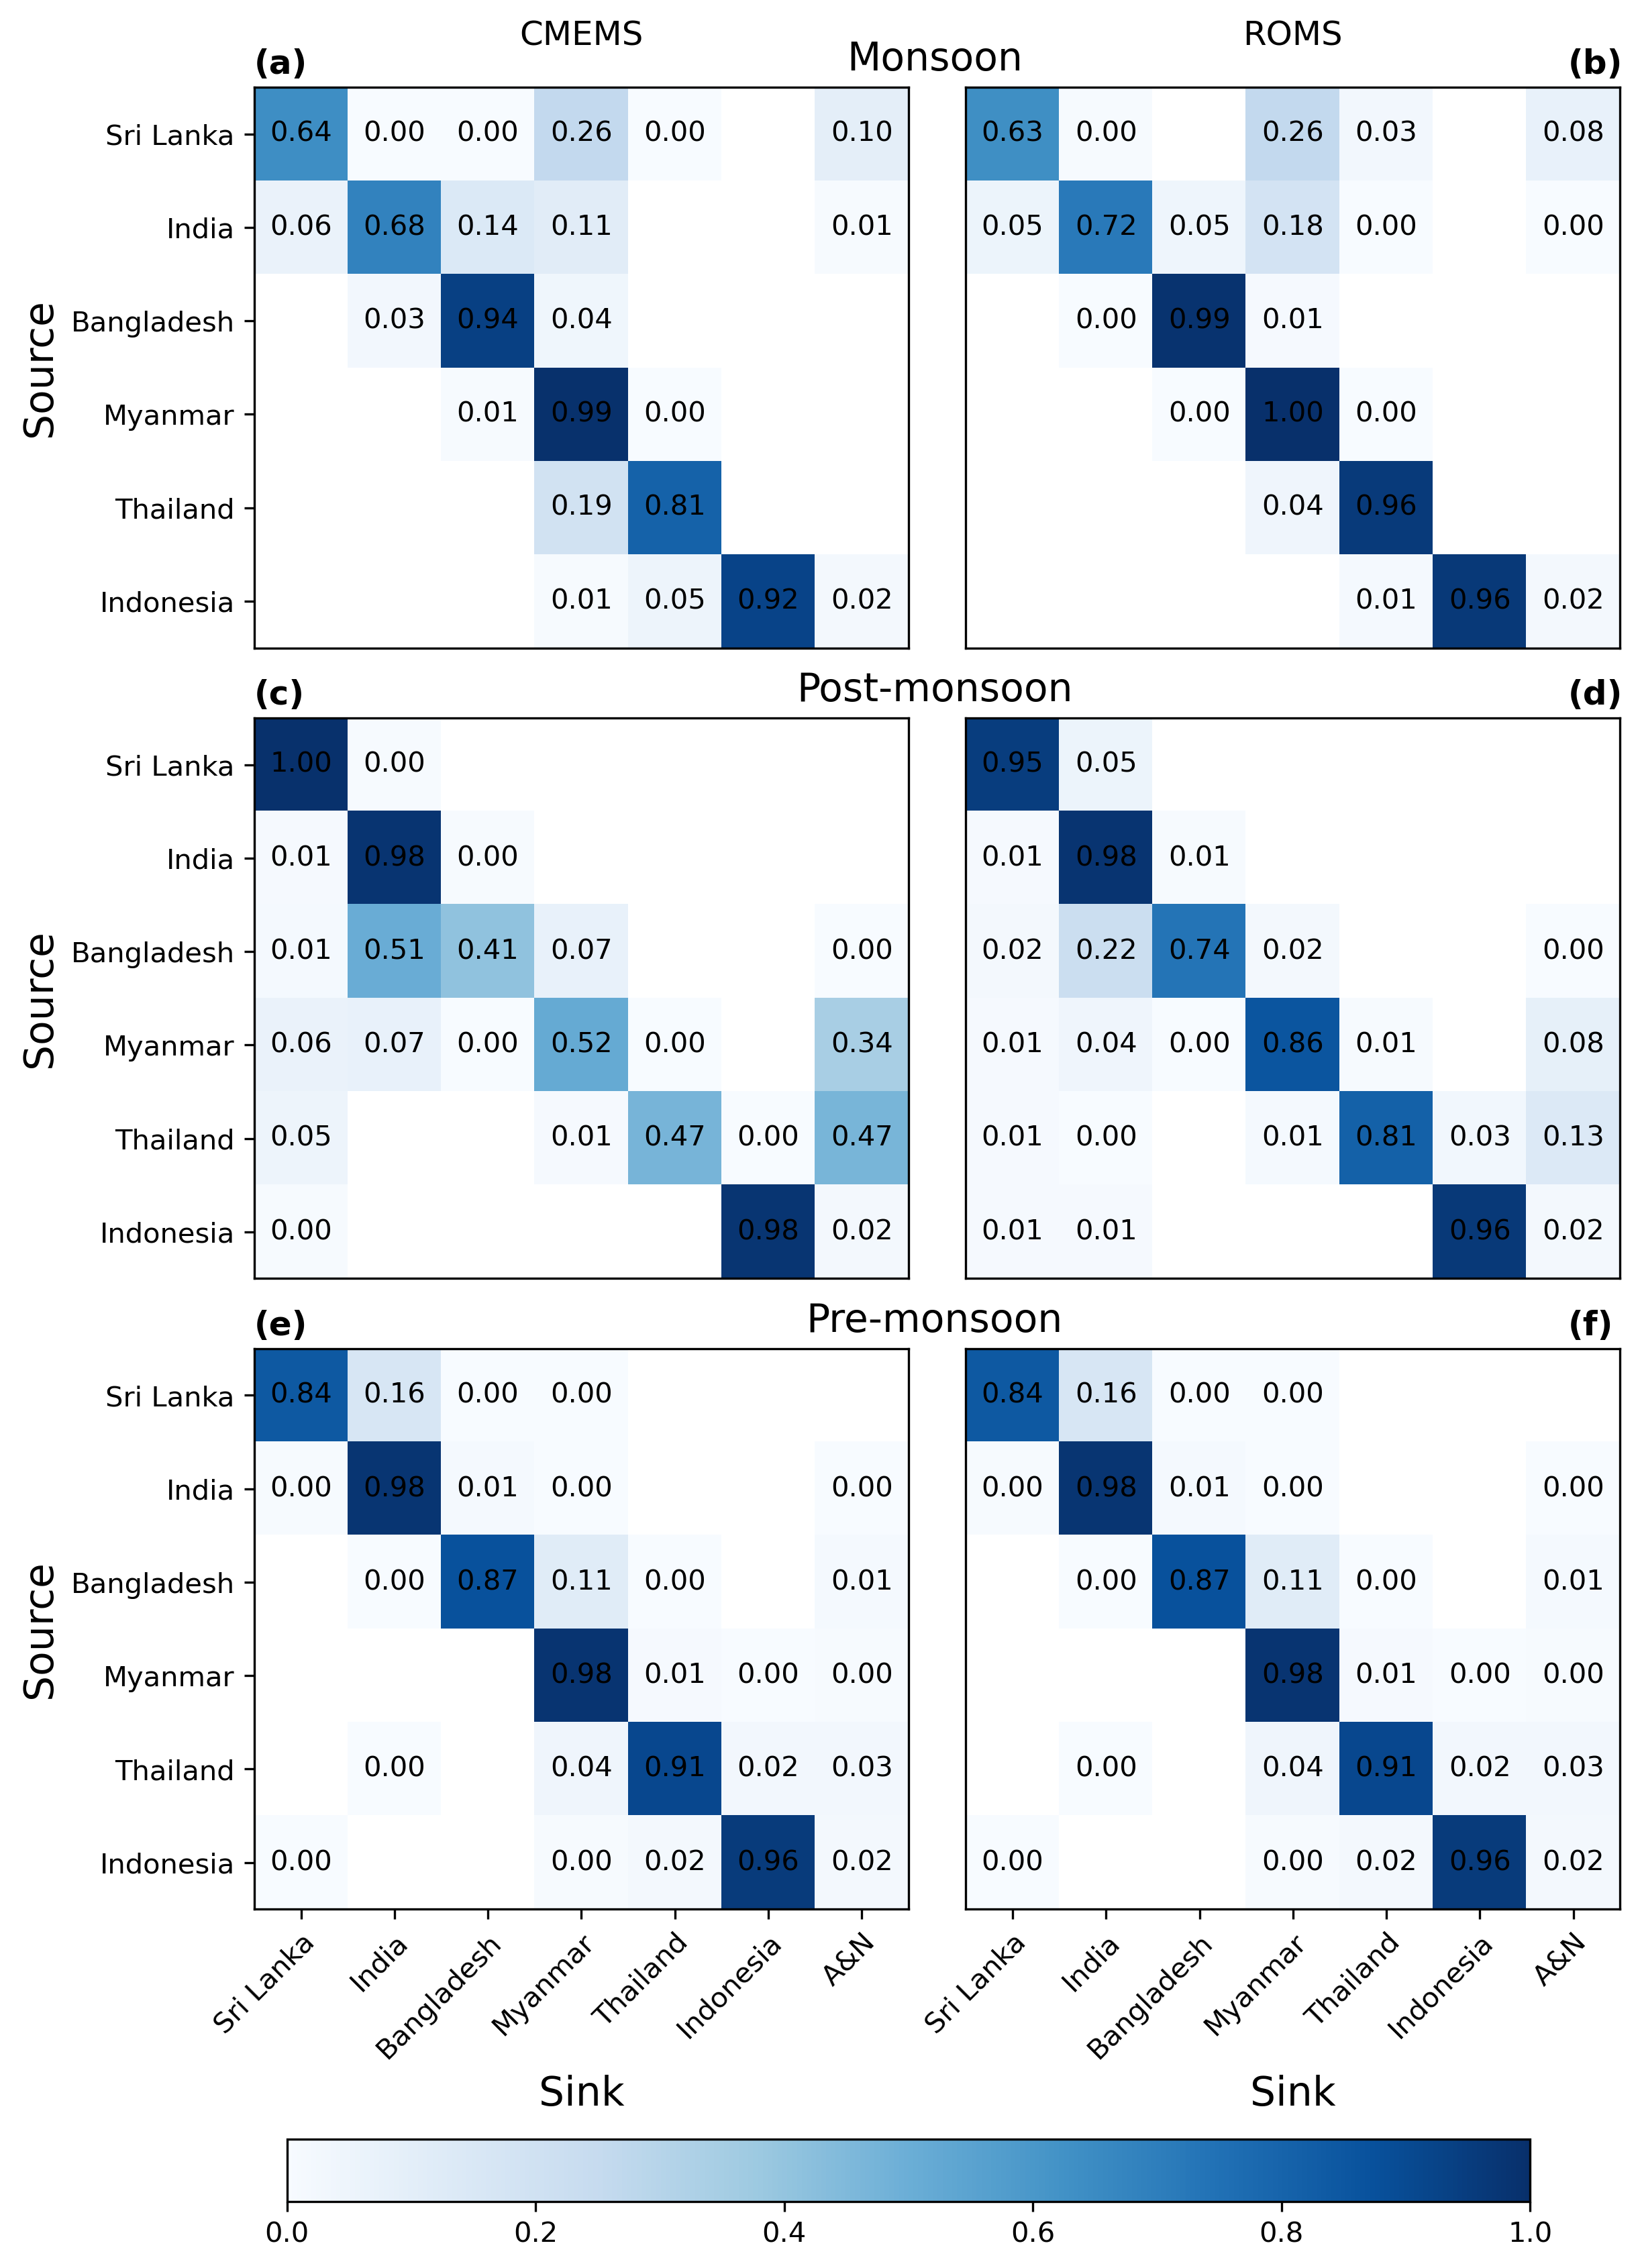

In [106]:
fig, axs = plt.subplots(3, 2, figsize=(8, 10), dpi=300)

# Add a title for each row
row_titles = ['Monsoon', 'Post-monsoon', 'Pre-monsoon']
for ii, title in enumerate(row_titles):
    # Position the text outside of the subfigure on the right side
    axs[ii, 0].text(1.04, 1.05, title, ha='center', va='center', fontsize=14, transform=axs[ii, 0].transAxes)

m = plot_conn_mat_paper_suppmat_noextras(axs[0,0], input_conn_mat_file_monsoon_CMEMS)
plot_conn_mat_paper_suppmat_noextras(axs[0,1], input_conn_mat_file_monsoon_ROMS)
plot_conn_mat_paper_suppmat_noextras(axs[1,0], input_conn_mat_file_post_CMEMS)
plot_conn_mat_paper_suppmat_noextras(axs[1,1], input_conn_mat_file_post_ROMS)
plot_conn_mat_paper_suppmat_noextras(axs[2,0], input_conn_mat_file_pre_ROMS)
plot_conn_mat_paper_suppmat_noextras(axs[2,1], input_conn_mat_file_pre_ROMS)

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.2, top=0.9, wspace=0, hspace=None)

cbar = fig.colorbar(m, ax=axs[-1, :],location='bottom', cmap='Blues')

# Get the current position of the colorbar
pos = cbar.ax.get_position()

# Set the new position of the colorbar
cbar.ax.set_position([pos.x0-0.07, pos.y0-0.29, pos.width+0.2, pos.height])

axs[0,0].text(0, 1.07, "(a)", transform=axs[0,0].transAxes, fontsize=12, fontweight='bold', va='top')
axs[0,1].text(0.92, 1.07, "(b)", transform=axs[0,1].transAxes, fontsize=12, fontweight='bold', va='top')
axs[1,0].text(0, 1.07, "(c)", transform=axs[1,0].transAxes, fontsize=12, fontweight='bold', va='top')
axs[1,1].text(0.92, 1.07, "(d)", transform=axs[1,1].transAxes, fontsize=12, fontweight='bold', va='top')
axs[2,0].text(0, 1.07, "(e)", transform=axs[2,0].transAxes, fontsize=12, fontweight='bold', va='top')
axs[2,1].text(0.92, 1.07, "(f)", transform=axs[2,1].transAxes, fontsize=12, fontweight='bold', va='top')

axs[0,0].text(0.5, 1.12, "CMEMS", transform=axs[0,0].transAxes, fontsize=12, ha='center', va='top')
axs[0,1].text(0.5, 1.12, "ROMS", transform=axs[0,1].transAxes, fontsize=12, ha='center', va='top')

# Adjust spacing between subplots
plt.tight_layout()

fig.savefig("/gpfs/home/rpe16nbu/projects/ocpp_mo1/plots/paper_data/figA02", bbox_inches='tight', facecolor='white', transparent=False)
